# Road Accident Analysis Addis Ababa

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, RFECV
from sklearn.cluster import DBSCAN,KMeans
from sklearn.manifold import TSNE
from sklearn.inspection import permutation_importance
import os
import warnings
from scripts.utils import is_colab,count_plot,plot_crosstab,cross_tab_features,histogram_plot,print_uniques


In [51]:
#suppress all warnings
warnings.filterwarnings("ignore")

<a id='load'></a>
# Loading Data Set
⬆️ [Tabel of Contents](#contents_tabel)

In [52]:
#load the data from the github repo or #using locally stored dataset
if is_colab():
    df=pd.read_csv('https://raw.githubusercontent.com/Teshager21/accident-analysis-addis_ababa/refs/heads/main/data/RTA%20Dataset.csv')
else: df=pd.read_csv('data/RTA Dataset.csv')

Running on local machine


In [53]:
df

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
0               Automobile            Owner              Above 10yr  ...   
1      Public (> 45 seats)            Owner                 5-10yrs  ...   
2          Lorry (41?100Q)            Owner                     NaN  ...   
3      Public (> 45 seats)     Governmental                     NaN  ...   
4                      NaN            Owner                 5-10yrs  ...   
...                    ...              ...                     ...  ...   
12311       Lorry (11?40Q)            Owner                     NaN  ...   
12312           Automobile            Owner                     NaN  ...   
12313                Bajaj            Owner                  2-5yrs  ...   
12314      Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315                Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
0       Going straight               na              na                   na   
1       Going straight               na              na                   na   
2       Going straight  Driver or rider            Male                31-50   
3       Going straight       Pedestrian          Female                18-30   
4       Going straight               na              na                   na   
...                ...              ...             ...                  ...   
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
0                    na               NaN                  NaN   
1                    na               NaN                  NaN   
2                     3            Driver                  NaN   
3                     3            Driver               Normal   
4                    na               NaN                  NaN   
...                 ...               ...                  ...   
12311                na            Driver

<a id='explore'></a>
# Exploratory Data Analysis
⬆️ [Tabel of Contents](#contents_tabel)

<a id='basic'></a>
### <i>Dataset Basic Information</i>
⬆️ [Tabel of Contents](#contents_tabel)

In [54]:
df.tail()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
12311   Lorry (11?40Q)            Owner                     NaN  ...   
12312       Automobile            Owner                     NaN  ...   
12313            Bajaj            Owner                  2-5yrs  ...   
12314  Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315            Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
12311                na            Driver               Normal   
12312                na            Driver               Normal   
12313                 3            Driver               Normal   
12314                na            Driver               Normal   
12315                 3            Driver               Normal   

                                                                 Pedestrian_movement  \
12311                                                               Not a Pedestrian   
12312                                                               Not a Pedestrian   
12313                                                               Not a Pedestrian   
12314                                                               Not a Pedestrian   
12315  Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle   

                          Cause_of_accident Accident_severity  
12311                         No distancing     Slight Injury  
12312                         No distancing     Slight Injury  
12313            Changing lane to the right    Serious Injury  
12314  Driving under the influence of drugs     Slight Injury  
12315            Changing lane to the right     Slight Injury  

[5 rows x 32 columns]

In [55]:
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [56]:
df.sample(10)

Time Day_of_week Age_band_of_driver Sex_of_driver  \
11389  16:20:00      Monday              18-30          Male   
105    16:10:00      Monday            Over 51          Male   
1620   12:20:00    Thursday              31-50          Male   
11722  12:48:00      Sunday              18-30          Male   
11892  18:35:00   Wednesday           Under 18          Male   
9346   11:10:00     Tuesday            Over 51          Male   
9297   16:55:00      Friday            Over 51          Male   
4888   18:09:00      Monday              18-30          Male   
1456    8:10:00    Thursday              31-50          Male   
4930    9:09:00      Monday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
11389  Junior high school                Employee             5-10yr   
105    Junior high school                Employee             5-10yr   
1620   Junior high school                   Owner              2-5yr   
11722  Junior high school                Employee              2-5yr   
11892  Junior high school                Employee         Above 10yr   
9346   Junior high school                Employee         Above 10yr   
9297    Elementary school                Employee             5-10yr   
4888    Elementary school                   Owner         Above 10yr   
1456    Elementary school                   Owner             5-10yr   
4930    Elementary school                Employee          Below 1yr   

         Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
11389                NaN            Owner                 5-10yrs  ...   
105                Other     Governmental                  2-5yrs  ...   
1620    Pick up upto 10Q            Owner                 Unknown  ...   
11722         Automobile            Owner                     NaN  ...   
11892    Lorry (41?100Q)     Governmental                     NaN  ...   
9346                 NaN            Owner                     NaN  ...   
9297        Stationwagen              NaN                     NaN  ...   
4888   Public (12 seats)     Governmental               Below 1yr  ...   
1456     Lorry (41?100Q)            Owner                 5-10yrs  ...   
4930          Automobile            Owner                 Unknown  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
11389         Turnover               na              na                   na   
105     Going straight               na              na                   na   
1620    Going straight  Driver or rider          Female              Over 51   
11722   Going straight       Pedestrian          Female                18-30   
11892   Going straight  Driver or rider            Male                31-50   
9346    Going straight       Pedestrian            Male                18-30   
9297             Other       Pedestrian          Female                18-30   
4888          Turnover               na              na                   na   
1456    Going straight               na              na                   na   
4930    Going straight               na              na                   na   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
11389                na               NaN               Normal   
105                  na               NaN                  NaN   
1620                  3               NaN                  NaN   
11722                 3            Driver               Normal   
11892                 3            Driver               Normal   
9346                  3            Driver               Normal   
9297                  3            Driver               Normal   
4888                 na            Driver               Normal   
1456                 na            Driver               Normal   
4930                 na            Driver               Normal   

      Pedestrian_movement                     Cause_of_accident  \
11389    Not a Pedestri

In [57]:
df.shape

(12316, 32)

In [58]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

#### Rename Columns- use small letters for column names

In [59]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}

In [60]:
df.rename(columns=col_map,inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [62]:
#Numerical Columns
df.describe().T

count      mean       std  min  25%  50%  75%  max
vehicles_involved  12316.0  2.040679  0.688790  1.0  2.0  2.0  2.0  7.0
casualties         12316.0  1.548149  1.007179  1.0  1.0  1.0  2.0  8.0

In [63]:
#for columns of object type
df.describe(include=['O']).T

count unique  \
time                     12316   1074   
day_of_week              12316      7   
driver_age               12316      5   
driver_sex               12316      3   
educational_level        11575      7   
vehicle_driver_relation  11737      4   
driving_experience       11487      7   
vehicle_type             11366     17   
vehicle_owner            11834      4   
service_year              8388      6   
vehicle_defect            7889      3   
accident_area            12077     14   
lanes                    11931      7   
road_allignment          12174      9   
junction_type            11429      8   
surface_type             12144      5   
road_surface_conditions  12316      4   
light_condition          12316      4   
weather_condition        12316      9   
collision_type           12161     10   
vehicle_movement         12008     13   
casualty_class           12316      4   
casualty_sex             12316      3   
casualty_age             12316      6   
casualty_severity        12316      4   
casualty_work             9118      7   
casualty_fitness          9681      5   
pedestrian_movement      12316      9   
accident_cause           12316     20   
accident_severity        12316      3   

                                                                      top  \
time                                                             15:30:00   
day_of_week                                                        Friday   
driver_age                                                          18-30   
driver_sex                                                           Male   
educational_level                                      Junior high school   
vehicle_driver_relation                                          Employee   
driving_experience                                                 5-10yr   
vehicle_type                                                   Automobile   
vehicle_owner                                                       Owner   
service_year                                                      Unknown   
vehicle_defect                                                  No defect   
accident_area                                                       Other   
lanes                    Two-way (divided with broken lines road marking)   
road_allignment                            Tangent road with flat terrain   
junction_type                                                     Y Shape   
surface_type                                                Asphalt roads   
road_surface_conditions                                               Dry   
light_condition                                                  Daylight   
weather_condition                                                  Normal   
collision_type                             Vehicle with vehicle collision   
vehicle_movement                                           Going straight   
casualty_class                                            Driver or rider   
casualty_sex                                                         Male   
casualty_age                                                           na   
casualty_severity                                                       3   
casualty_work                                                      Driver   
casualty_fitness                                                   Normal   
pedestrian_movement                                      Not a Pedestrian   
accident_cause                                              No distancing   
accident_severity                                           Slight Injury   

                          freq  
time                       120  
day_of_week               2041  
driver_age                4271  
driver_sex               11437  
educational_level         7619  
vehicle_driver_relation   9627  
driving_experience        3363  
vehicle_type              3205  
vehicle_owner            10459  
service_year              2883  
ve

<a id='missing'></a>
<b>Missing Values</b>
⬆️ [Tabel of Contents](#contents_tabel)

In [64]:
#number of missing values in each column & Missing values in percentage
missing_percentages=df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing_percentages[missing_percentages>0]
missing_values=pd.DataFrame(df.isna().sum().sort_values(ascending=False)[df.isna().sum()>0],columns=['#missing_values'])
print(missing_values.shape)
missing_values['percentage']=missing_percentages[missing_percentages>0].apply(lambda x: f"{x:.2f}%")
missing_values


(16, 1)


#missing_values percentage
vehicle_defect                      4427     35.95%
service_year                        3928     31.89%
casualty_work                       3198     25.97%
casualty_fitness                    2635     21.39%
vehicle_type                         950      7.71%
junction_type                        887      7.20%
driving_experience                   829      6.73%
educational_level                    741      6.02%
vehicle_driver_relation              579      4.70%
vehicle_owner                        482      3.91%
lanes                                385      3.13%
vehicle_movement                     308      2.50%
accident_area                        239      1.94%
surface_type                         172      1.40%
collision_type                       155      1.26%
road_allignment                      142      1.15%

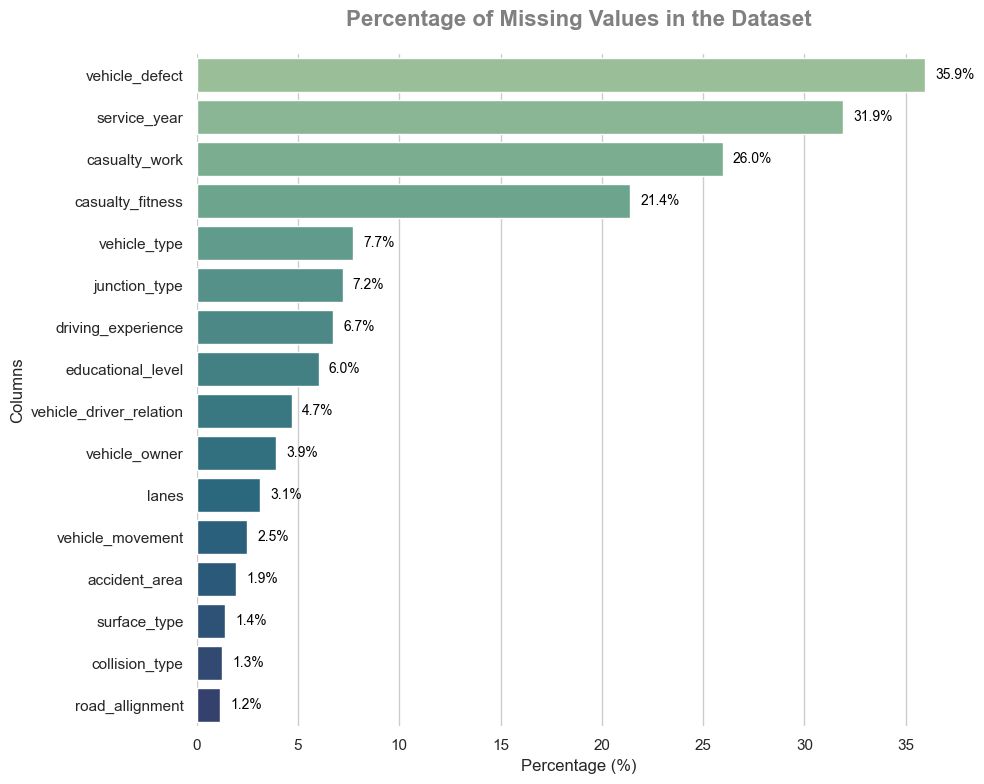

In [65]:
#plot percentage of missing data
missing_data = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    y=missing_data.index,
    x=missing_data.values,
    palette="crest"
)

# Add title and labels
plt.title("Percentage of Missing Values in the Dataset", fontsize=16, fontweight="bold", color="gray", pad=20)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Columns", fontsize=12)

# Add percentage annotations on bars
for index, value in enumerate(missing_data.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', ha='left', fontsize=10, color="black")

# Remove legend (not needed)
plt.legend([], [], frameon=False)

# Improve layout and aesthetics
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [66]:
#missing values in numerical data
numerical_columns=df.select_dtypes(exclude='object')
numerical_columns.isna().sum()

vehicles_involved    0
casualties           0
dtype: int64

<b>Missingness</b>

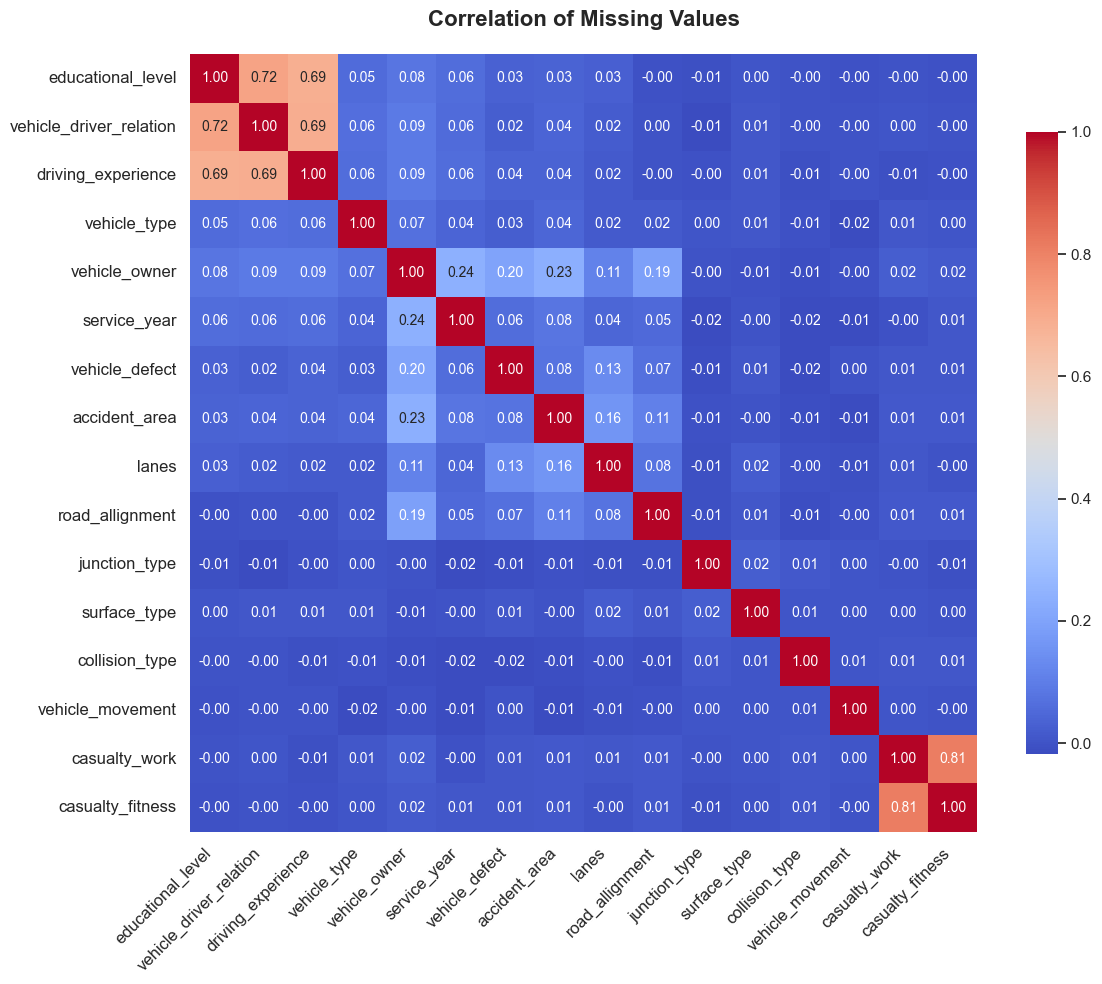

In [67]:
#check if data is missing completely at ramdom(MCAR), at random(MAR) or not at random(MNAR)
missingness = df.isnull().astype(int)
missingness = missingness.loc[:, (missingness.sum(axis=0) > 0)]
correlation_matrix = missingness.corr()

# Increase plot size and apply Seaborn theme
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)

# Add title and adjust axis labels
plt.title("Correlation of Missing Values", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* MAR: Moderate correlations between missing values in some columns and observed values in other columns might indicate MAR. However, it's difficult to distinguish MAR from MNAR with just correlations.
* MNAR: Strong correlations between missingness and specific observed values (especially variables related to the missing value itself) could be a sign of MNAR. However, domain knowledge about the data collection process is crucial to confirm this.
</div>

<a id='duplicated'></a>
<b>Duplicated Values</b>
⬆️ [Tabel of Contents](#contents_tabel)

In [68]:
print(df.duplicated().sum())

0


<b>#Unique Values per Columns</b>

In [69]:
df.nunique().sort_values(ascending=False)

time                       1074
accident_cause               20
vehicle_type                 17
accident_area                14
vehicle_movement             13
collision_type               10
weather_condition             9
road_allignment               9
pedestrian_movement           9
junction_type                 8
casualties                    8
casualty_work                 7
lanes                         7
driving_experience            7
educational_level             7
day_of_week                   7
casualty_age                  6
vehicles_involved             6
service_year                  6
casualty_fitness              5
surface_type                  5
driver_age                    5
vehicle_driver_relation       4
vehicle_owner                 4
casualty_class                4
casualty_severity             4
light_condition               4
road_surface_conditions       4
vehicle_defect                3
driver_sex                    3
casualty_sex                  3
accident

<b>Distinct Values</b>

In [70]:
print_uniques(df)

## Handling Inconsistencies

In [71]:
#messy data
df['accident_area'].value_counts()

accident_area
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [72]:
#inconsistencies
#there is space infront of some of the values resulting in inconsistency
df['accident_area'] = df['accident_area'].str.lstrip()
df['accident_area'].value_counts()

accident_area
Other                              3819
Office areas                       3451
Residential areas                  2060
Church areas                       1060
Industrial areas                    456
School areas                        415
Recreational areas                  328
Outside rural areas                 218
Hospital areas                      121
Market areas                         63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Name: count, dtype: int64

In [73]:
df['accident_area'].replace('Rural village areasOffice areas','Rural village areas',inplace=True)
df['accident_area'].value_counts()

accident_area
Other                  3819
Office areas           3451
Residential areas      2060
Church areas           1060
Industrial areas        456
School areas            415
Recreational areas      328
Outside rural areas     218
Hospital areas          121
Rural village areas      64
Market areas             63
Unknown                  22
Name: count, dtype: int64

In [74]:
df['accident_cause'].value_counts()

accident_cause
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Improper parking                          25
Unknown                                   25
Name: count, dtype: int64

In [75]:
# some causes are reperesented in different words
df['accident_cause'].replace("Turnover","Overturning",inplace=True)
df['accident_cause'].replace("Overspeed",'Driving at high speed',inplace=True)
df['accident_cause'].value_counts()

accident_cause
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Driving at high speed                    235
Overturning                              227
Getting off the vehicle improperly       197
Overloading                               59
Drunk driving                             27
Improper parking                          25
Unknown                                   25
Name: count, dtype: int64

In [76]:
df['pedestrian_movement'].value_counts()

pedestrian_movement
Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                             

<a id='univariate'></a>
### <i>Univariate Analysis</i>
⬆️ [Tabel of Contents](#contents_tabel)

In [77]:
#nominal and ordinal features
nominal_features=['day_of_week', 'driver_sex','vehicle_driver_relation', 'vehicle_type','vehicle_owner', 'accident_area','lanes', 'road_allignment',
                   'junction_type', 'surface_type','road_surface_conditions', 'light_condition', 'weather_condition', 'collision_type', 'vehicle_movement','casualty_class', 
                   'casualty_sex', 'casualty_fitness', 'casualty_work', 'pedestrian_movement','accident_cause']
df['vehicle_defect'].replace("No defect",'0',inplace=True)
ordinal_features=['driver_age', 'educational_level', 'driving_experience', 'service_year', 'casualty_age','casualty_severity', 'vehicle_defect','accident_severity']
len(nominal_features)+len(ordinal_features)

29

In [78]:
df['vehicle_defect'].unique()

array(['0', nan, '7', '5'], dtype=object)

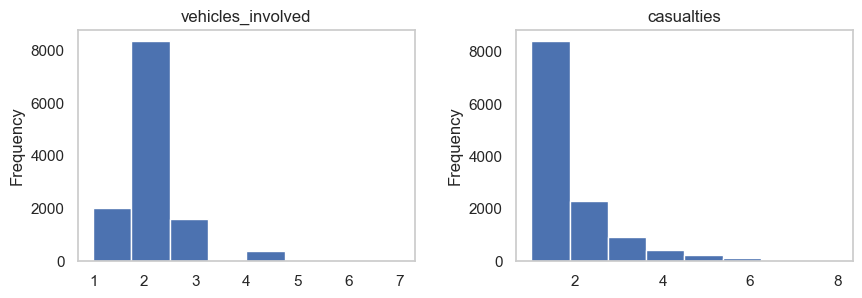

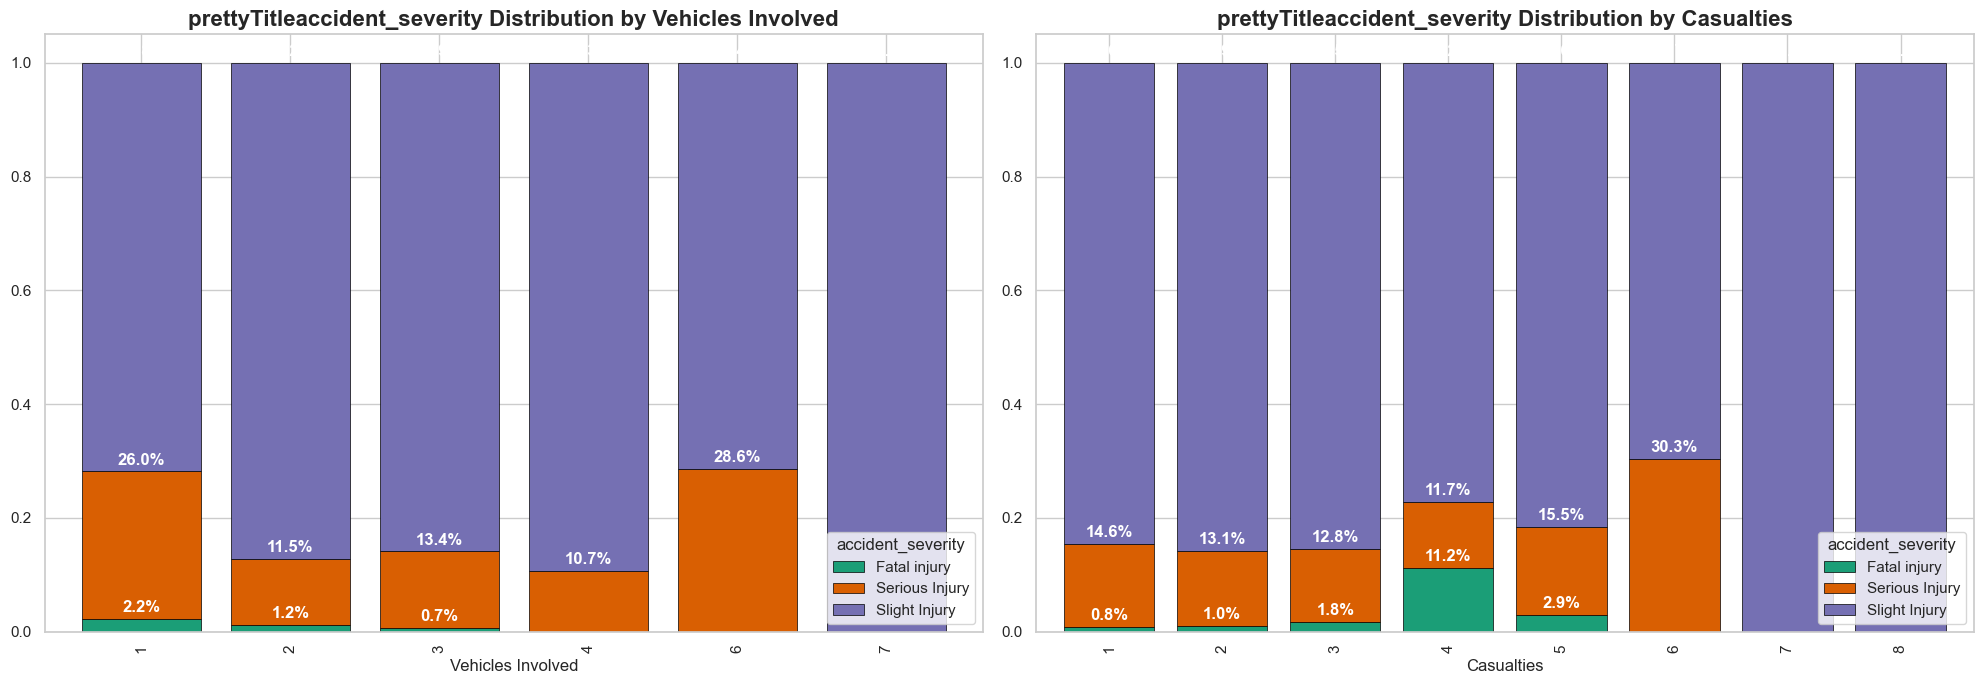

In [79]:
#distribution of numerical columns
axes=df.hist(grid=False, figsize=(10, 3),bins=8)
for ax in axes.flatten():
    # ax.set_title(f'Histogram of {ax.get_xlabel()}')
    ax.set_xlabel(ax.get_xlabel())
    ax.set_ylabel('Frequency')
fig,ax=plt.subplots(1,2,figsize=(20,7))
histogram_plot(df,'vehicles_involved',hue='accident_severity',ax=ax[0])
histogram_plot(df,'casualties',hue='accident_severity',ax=ax[1])
plt.tight_layout()



<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* As the number of vehicles involved in an accident increases fatality decreases, no fatalities for 4 and above vehicles involved
* When there were 7 and 8 casualties there were only slight injuries
* Higher percentage of serious injuries were incurred when there where 6 vehicles(28.6%) and 6 causalties(30.3%) involved  
</div>

<b>Skewness</b>

In [80]:
count_value= df['accident_severity'].value_counts()
proportions = count_value / count_value.sum()
print(round(proportions,2))


accident_severity
Slight Injury     0.85
Serious Injury    0.14
Fatal injury      0.01
Name: count, dtype: float64


In [81]:
cv = np.std(proportions) / np.mean(proportions)
print(f"Coefficient of Variation: {cv}")

Coefficient of Variation: 1.09815368128082


<Axes: title={'center': 'Category Proportions'}, xlabel='accident_severity'>

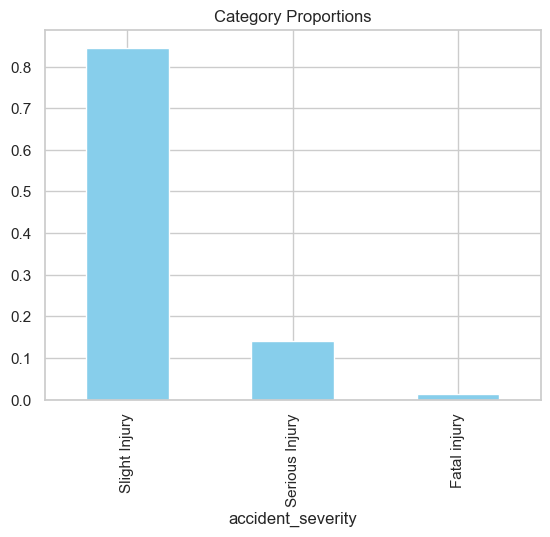

In [82]:
proportions.plot(kind='bar', color='skyblue', title='Category Proportions')

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* The label i.e accident_severity is unbalanced in need of oversampling methods like SMOTE
    
</div>

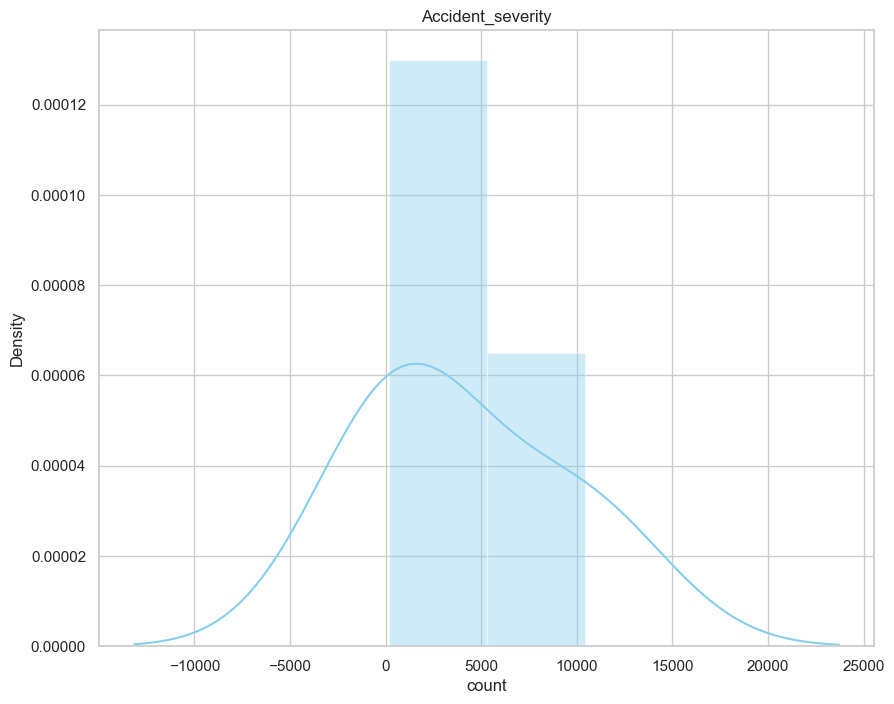

In [83]:
plt.figure(figsize= (10,8))
sns.distplot(count_value,color='skyblue')
plt.title("Accident_severity")
plt.show()

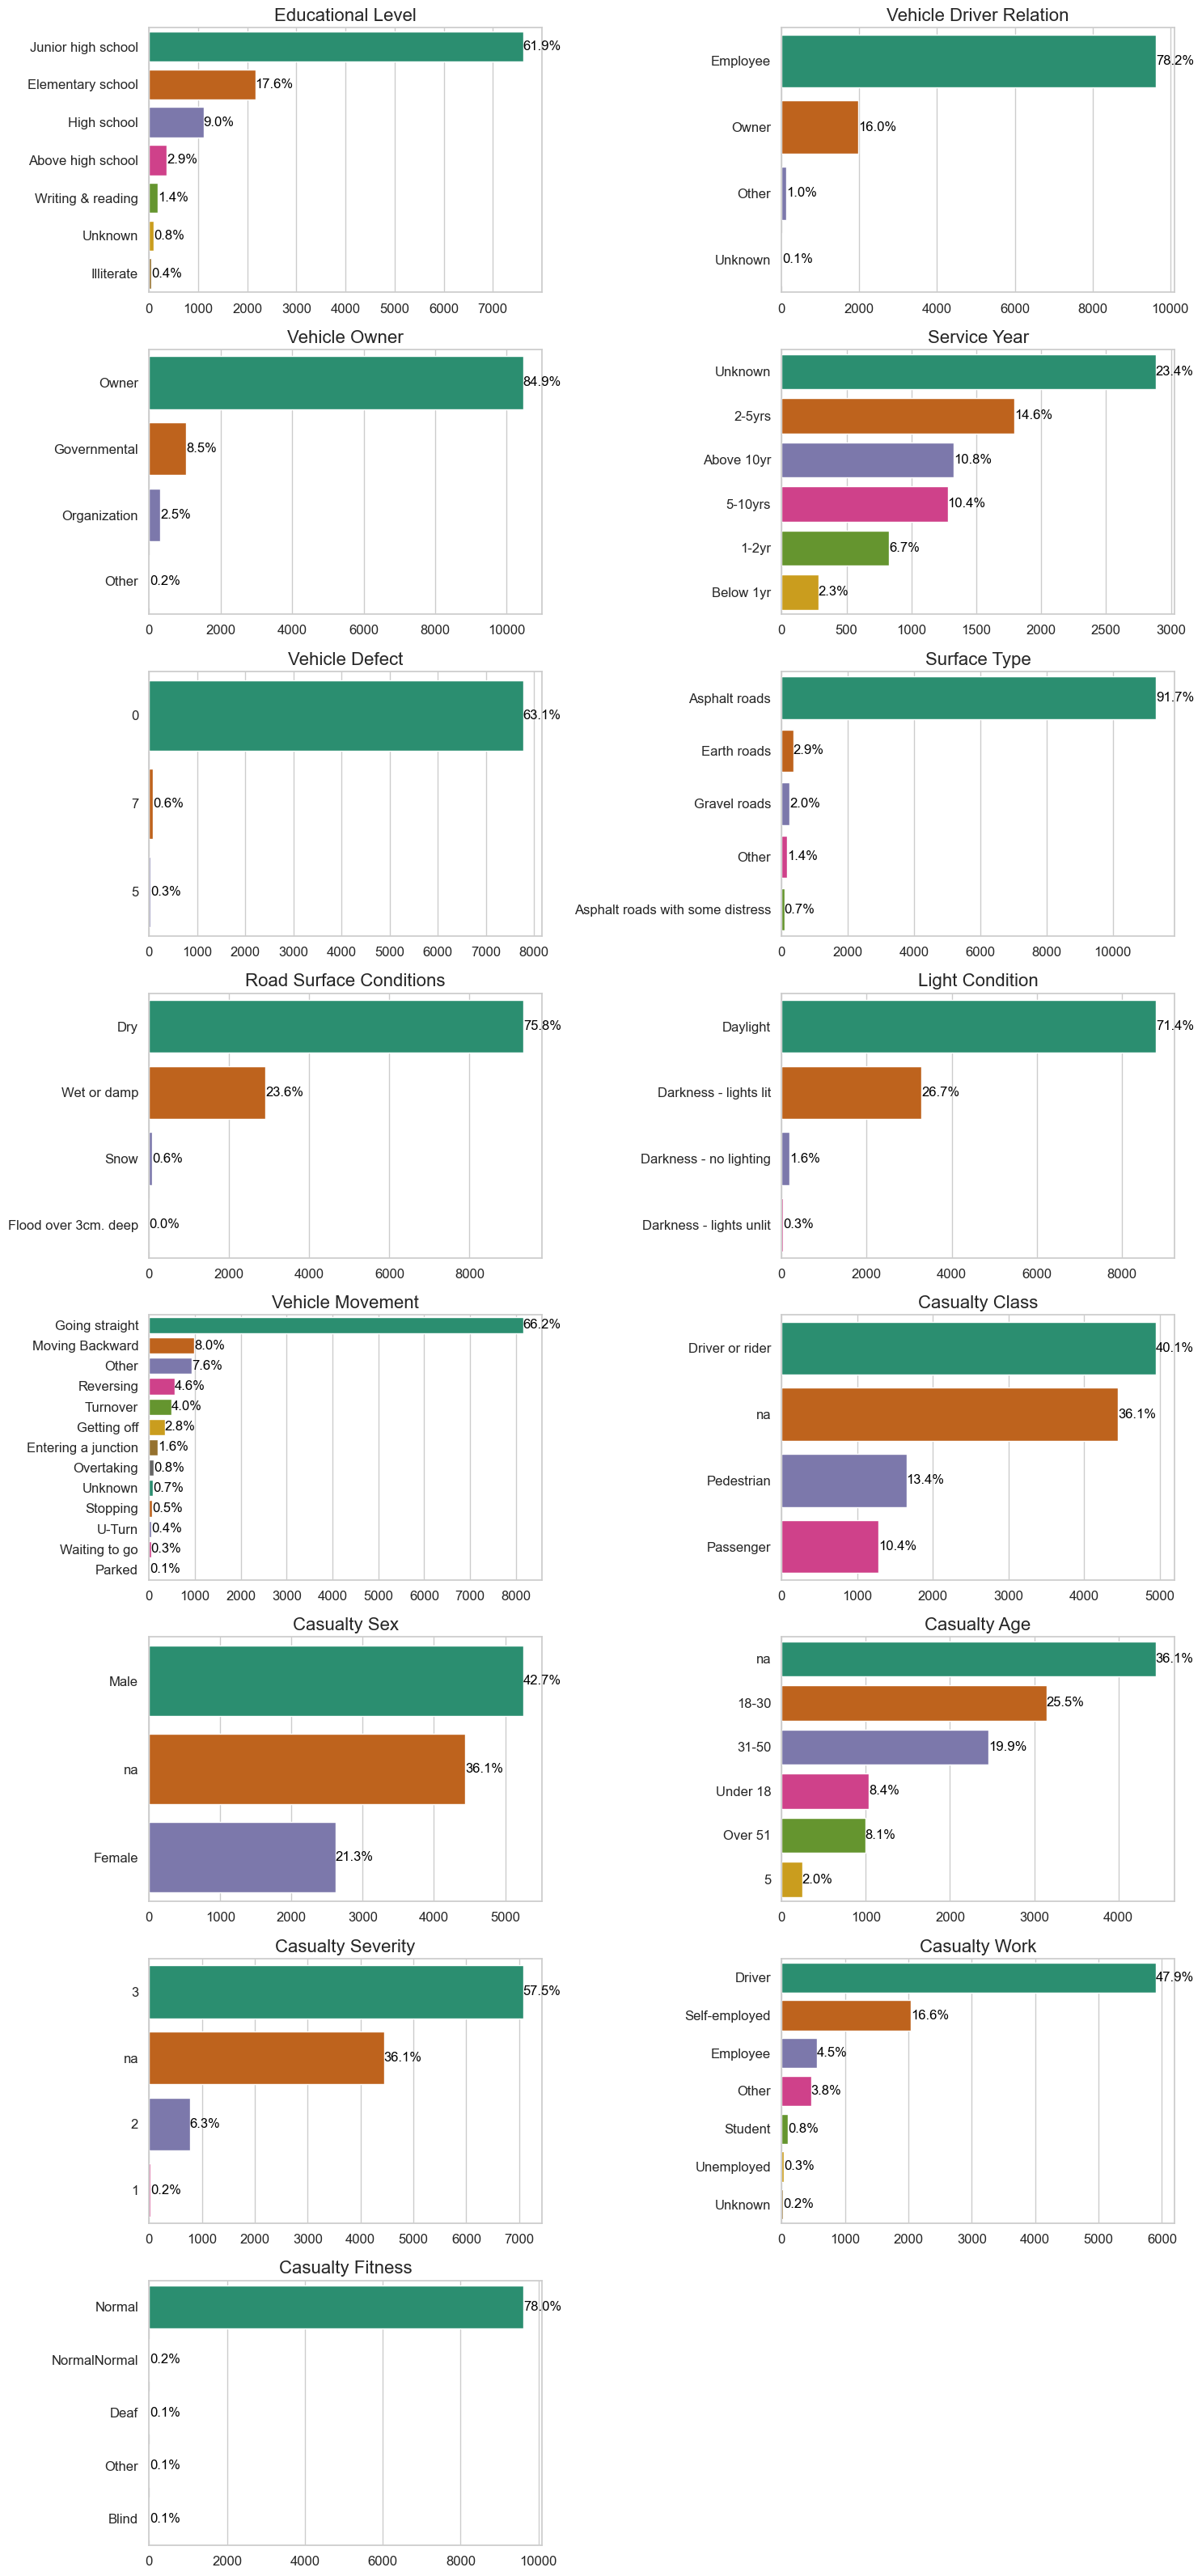

In [84]:
# Define the columns to plot (excludes the specified ones)
exclude_columns = ['time', 'lanes', 'road_allignment', 'junction_type', 
                   'weather_condition', 'pedestrian_movement', 'day_of_week', 
                   'accident_severity', 'accident_area', 'casualties', 'vehicle_type',
                   'vehicles_involved', 'accident_cause', 'driver_sex', 'collision_type','driver_age','driving_experience']


columns_to_plot = df.drop(exclude_columns, axis=1).columns     # List of columns to plot
num_rows = (len(columns_to_plot) // 2) + (len(columns_to_plot) % 2)    # Calculate number of rows based on the number of columns to plot
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4*num_rows))      # Create subplots with 2 columns
axes = axes.flatten()      # Flatten to make it easy to iterate over
for i, col in enumerate(columns_to_plot):     # Loop through each column and plot
    count_plot(df, col, col.title(), ordered=True, ax=axes[i])     # Use the custom count_plot2 function on each subplot
if len(columns_to_plot) % 2 != 0:
    fig.delaxes(axes[-1])
plt.tight_layout()

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Drivers are by far the most affected by accidents consist 47.9% of the all casualties
* Most accidents happens during day light (71.4%)
    
</div>

#### <i>Accident distribution through out the week days<i>

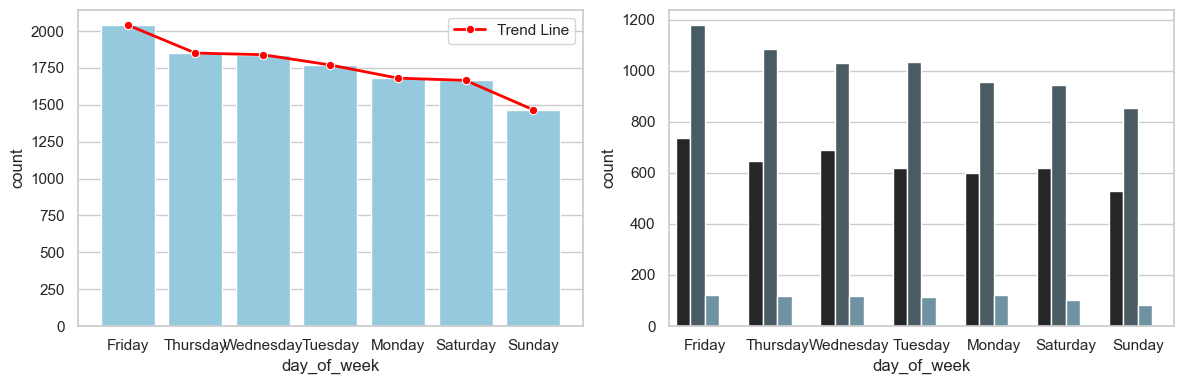

In [85]:
# Calculate value counts for accidents per day and sort them in descending order
day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sorted_order = day_counts.sort_values(ascending=False).index # Sort the days based on accident count (descending order)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(data=df, x='day_of_week', ax=axes[0], order=sorted_order, color='skyblue') # Countplot ordered by accident frequency
sns.lineplot(x=sorted_order, y=day_counts[sorted_order], color='red', marker='o', label='Trend Line', linewidth=2, ax=axes[0]) # Add trend line (optional)
sns.countplot(x='day_of_week', hue='casualty_severity', data=df, order=sorted_order, ax=axes[1], palette="viridis", legend=False) # Second countplot with hue
sns.countplot(x=df['day_of_week'],hue=df['casualty_severity'],order=sorted_order,legend=False,ax=axes[1],color='skyblue') #show the breakdown by accident severity
plt.tight_layout() # Tight layout
plt.show()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Friday is the most accident prone day of all the other days for all categories of accident severity
* The accident decreases from Friday to Thursday  then Wednesday right up to Sunday in an orderly fashion
    
</div>

#### <i>Accident distribution by hour<i>

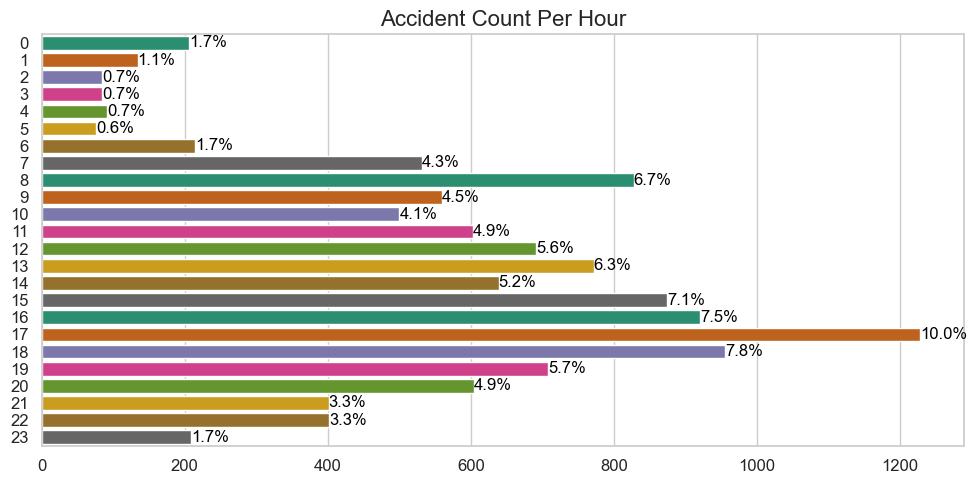

<Figure size 3000x700 with 0 Axes>

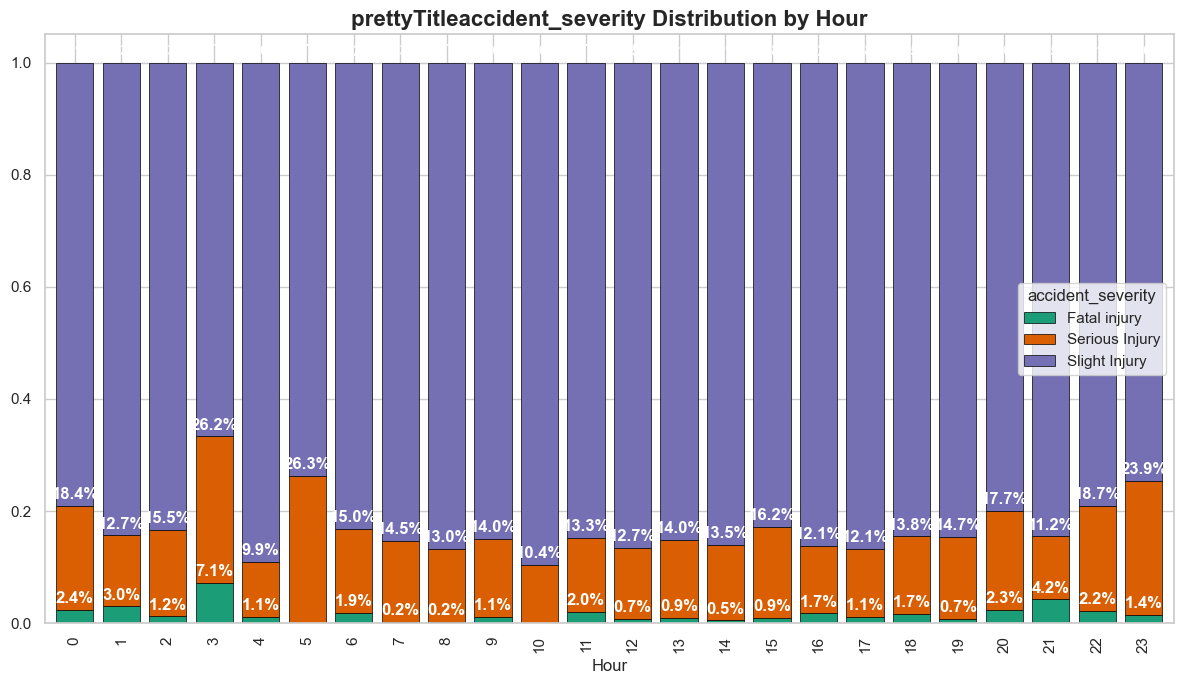

In [86]:
df['hour']=pd.to_datetime(df['time'],format='%H:%M:%S').dt.hour
count_plot(df,'hour',"Accident count per hour",False)
plt.figure(figsize=(30,7))
histogram_plot(df,'hour',hue='accident_severity')
plt.tight_layout()
df.drop('hour', axis=1, inplace=True) # Remove the 'hour' column after plotting


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#fAf9f6;background-color:#2c2c2c;">
<h3 align="left"><font color=#fAf9f6>💡 Observations:</font></h3>

Most accidents happen around three critical peak hours:
* 8:00  - > Typical start  of work hour for offices,industries
* 13:00  - > Typical lunch hour
* 17:00 - > Typical Exit from work hour

Least accidents happen during the night period:
* From 23:00-5:00
Severity
* 3 is the most dangerous hour consisting of 26.2% Serious accidents and 7.1 % Fatality
* 5 is the hour of biggest proportion of serious accidents
* 5,7,8,10 had no fatal accidents
    
</div>

#### Accident Area

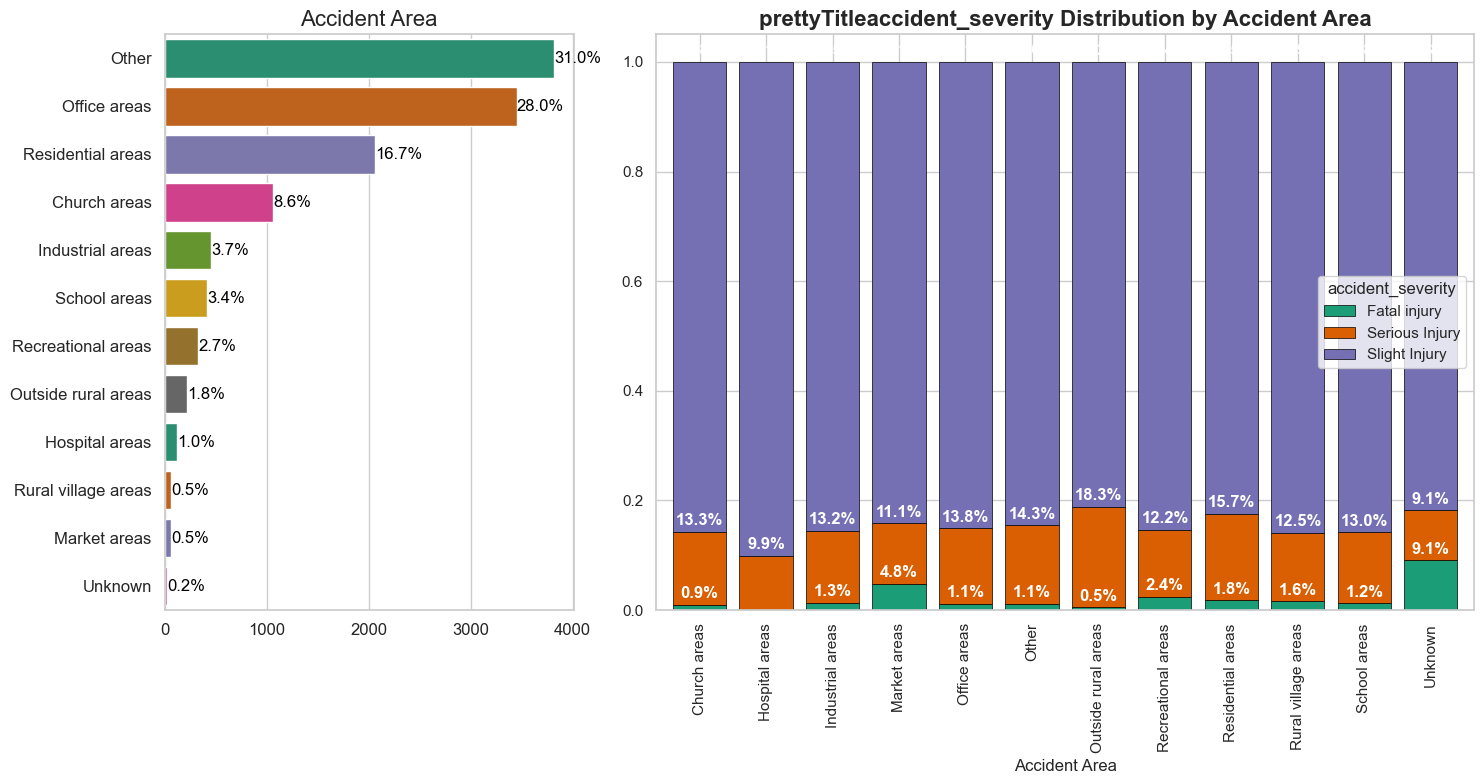

In [87]:
# Create subplots with adjusted width ratios
fig, ax = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 2]}) 
count_plot(df, 'accident_area', "Accident Area", ax=ax[0])
histogram_plot(df, 'accident_area', 'accident_severity', ax=ax[1])
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>


* Market areas have the highet proportion of Fatality(4.8%)
* Outside rural area have the highest serious accident proportion(18.3%)
* Hospital areas have no fatalities and have the least proportion of serious accidents (9.9%)

</div>

### Junction Type

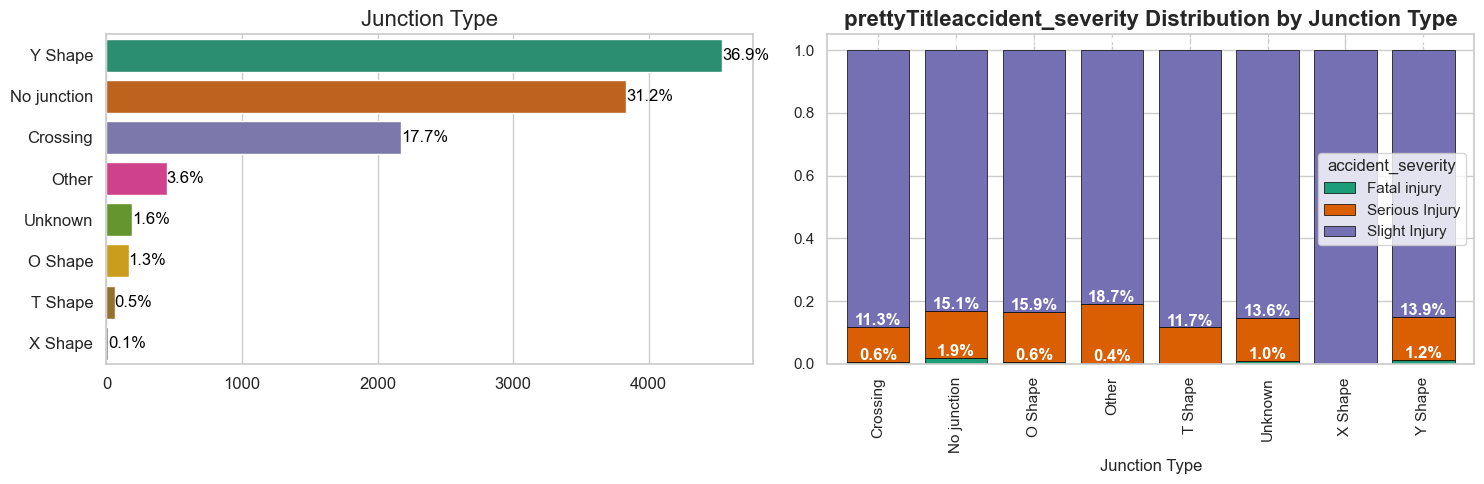

In [88]:
#Junction Type
fig,ax= plt.subplots(1,2,figsize=(15,5))
count_plot(df,'junction_type',"Junction Type",ax=ax[0])
histogram_plot(df,'junction_type','accident_severity',ax=ax[1])
plt.tight_layout()

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* 'No Junction' points have the highest proportion of fatalities(1.9%)
* 'O Shape' and 'No junctions' points have the highest propotion of serious accidents(15.9%,15.1%)
* 'X Shape' points have no fatalities and serious accidents
    
</div>

### Vehicle Type

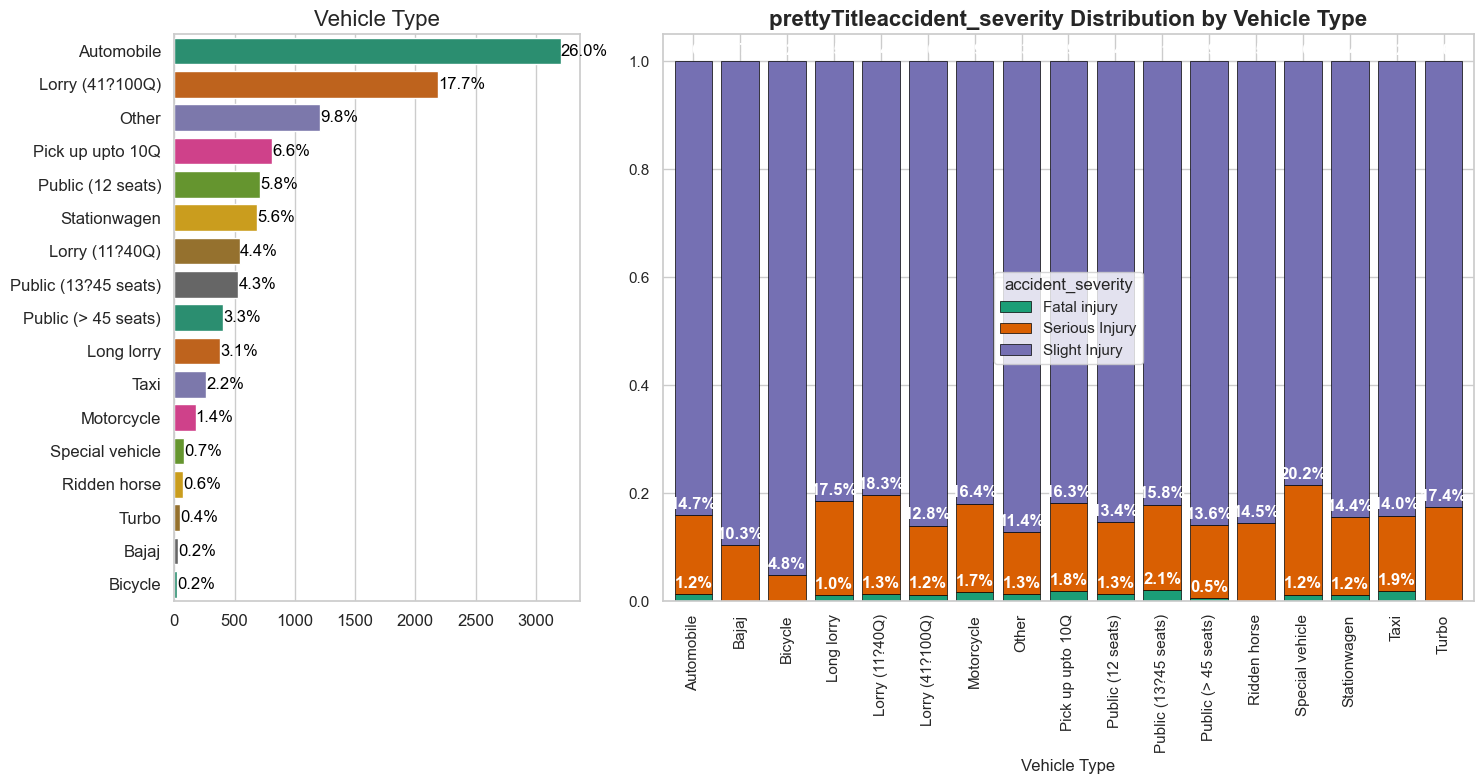

In [89]:
# Create subplots with adjusted width ratios
fig, ax = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 2]}) 
count_plot(df, 'vehicle_type', "Vehicle Type", ax=ax[0])
histogram_plot(df, 'vehicle_type', 'accident_severity', ax=ax[1])
plt.tight_layout()
plt.show()

#### <i>Accident distribution through out the Weekends vs Weekdays<i>

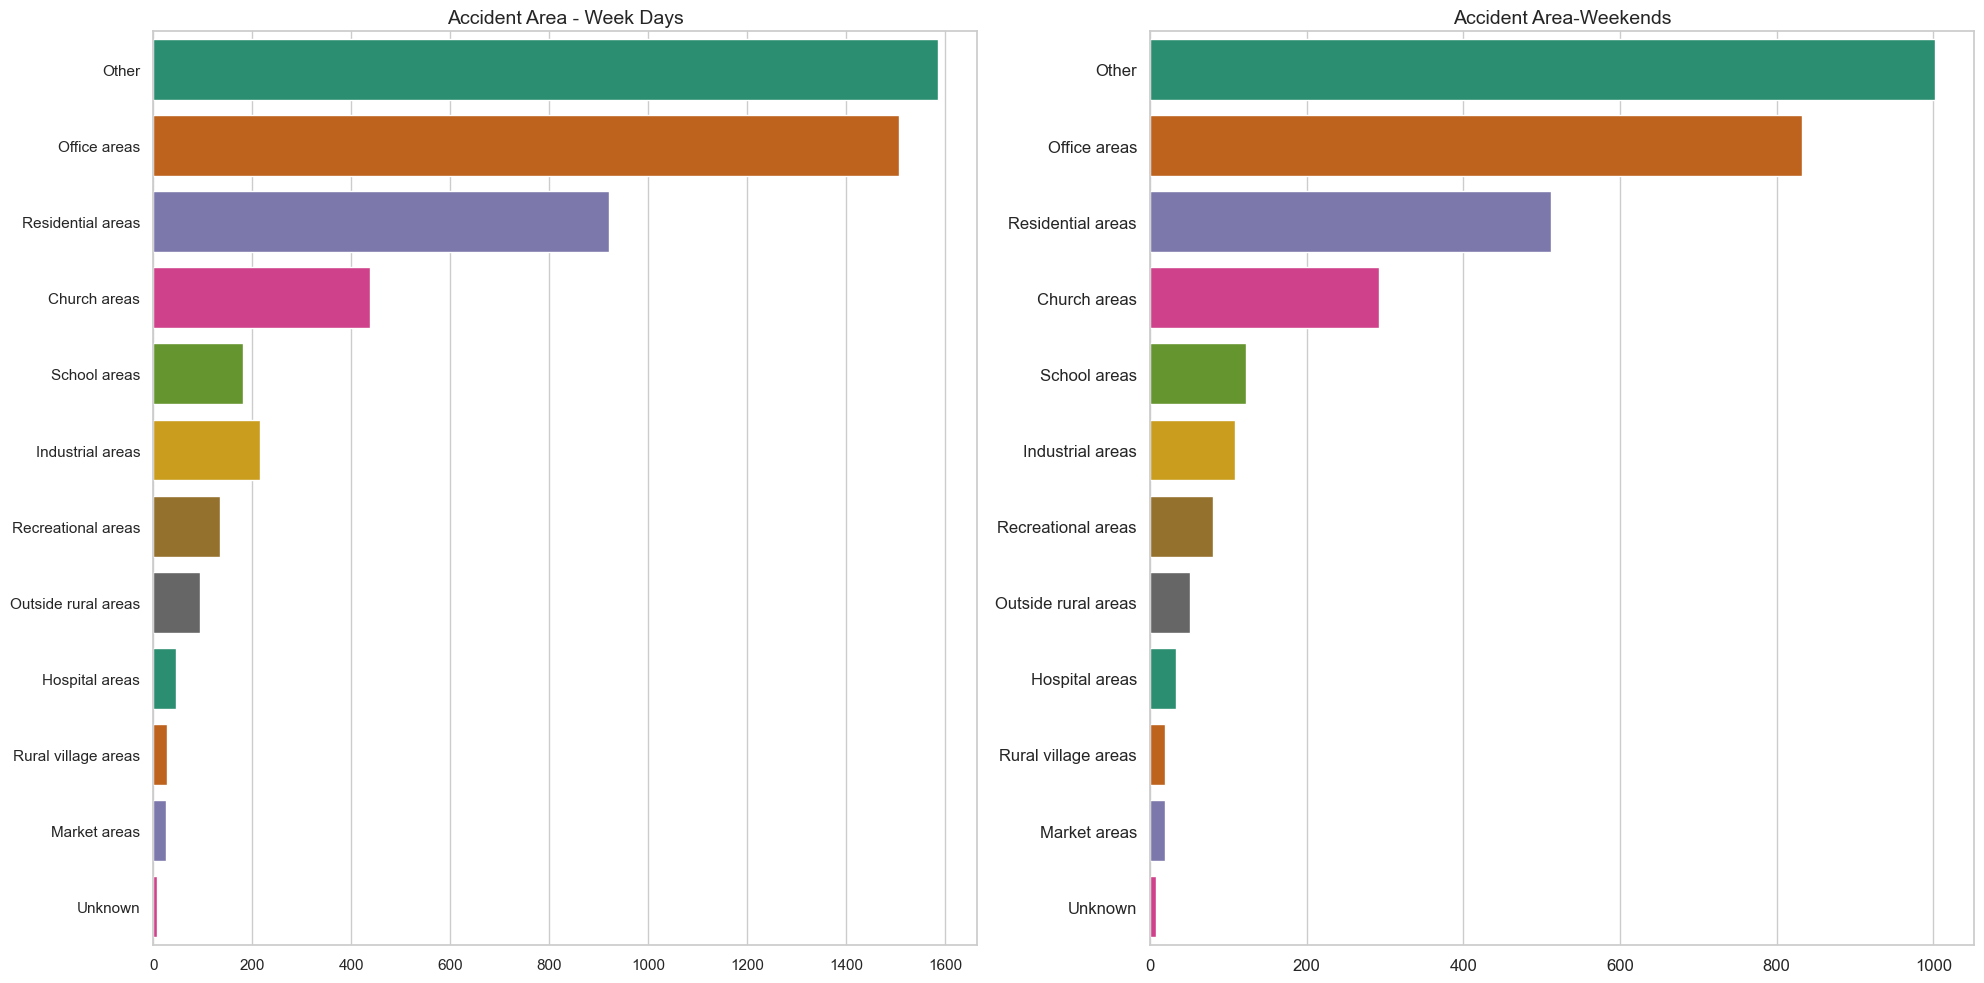

In [90]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
order=df['accident_area'].where(df['day_of_week'].isin(["Saturday","Sunday"])).value_counts().sort_values(ascending=False).index
weekday_df=df[df['day_of_week'].isin(["Monday","Tuesday","Wednesday","Thursady","Firday"])]
weekend_df=df[df['day_of_week'].isin(["Saturday","Sunday"])]
sns.countplot(data=weekday_df, y='accident_area', palette = 'Dark2',ax=ax[0],order=order)
ax[0].set_title('Accident Area - Week Days', fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
sns.countplot(data=weekend_df, y='accident_area', palette = 'Dark2',order=order,ax=ax[1])
ax[1].set_title('Accident Area - Weekends', fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area-Weekends', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### <i>Accidents vs Weather Conditions<i>

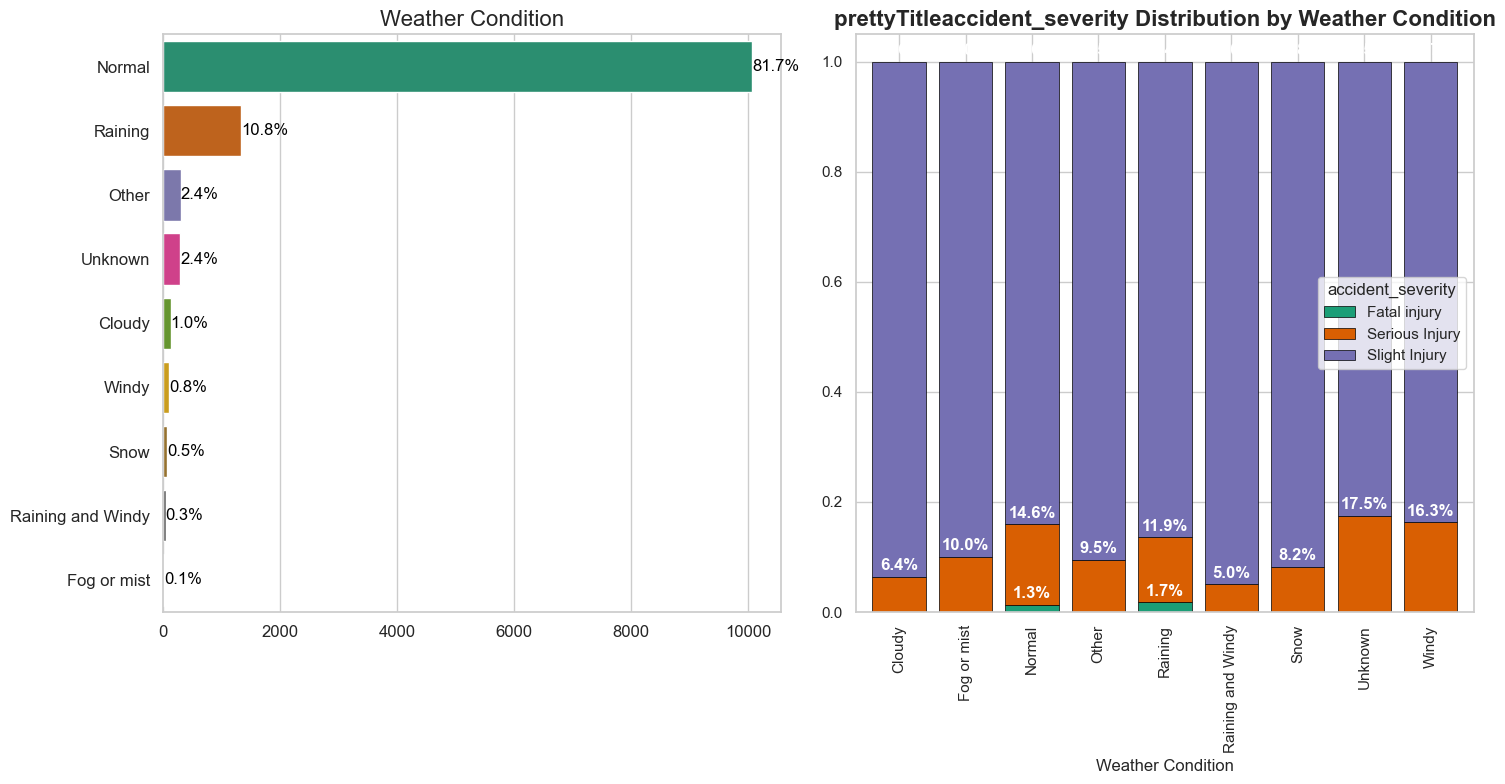

In [91]:
#Weather condition
fig,ax= plt.subplots(1,2,figsize=(15,8))
count_plot(df,'weather_condition','Weather Condition',ax=ax[0])
histogram_plot(df,'weather_condition','accident_severity',ax=ax[1])
plt.tight_layout()

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Accident during rain consist of the highest percentage of fatality (1.7%) despite the fact that 81.7% of accidents happened during clear weather
* Accidents during Windy consist of the highest percentage of serious injuries (16.3%)
* Raining and Windy weather accidents have the least percentage of serious accidents(5%)
    
</div>

#### <i>Accident per Lanes<i>

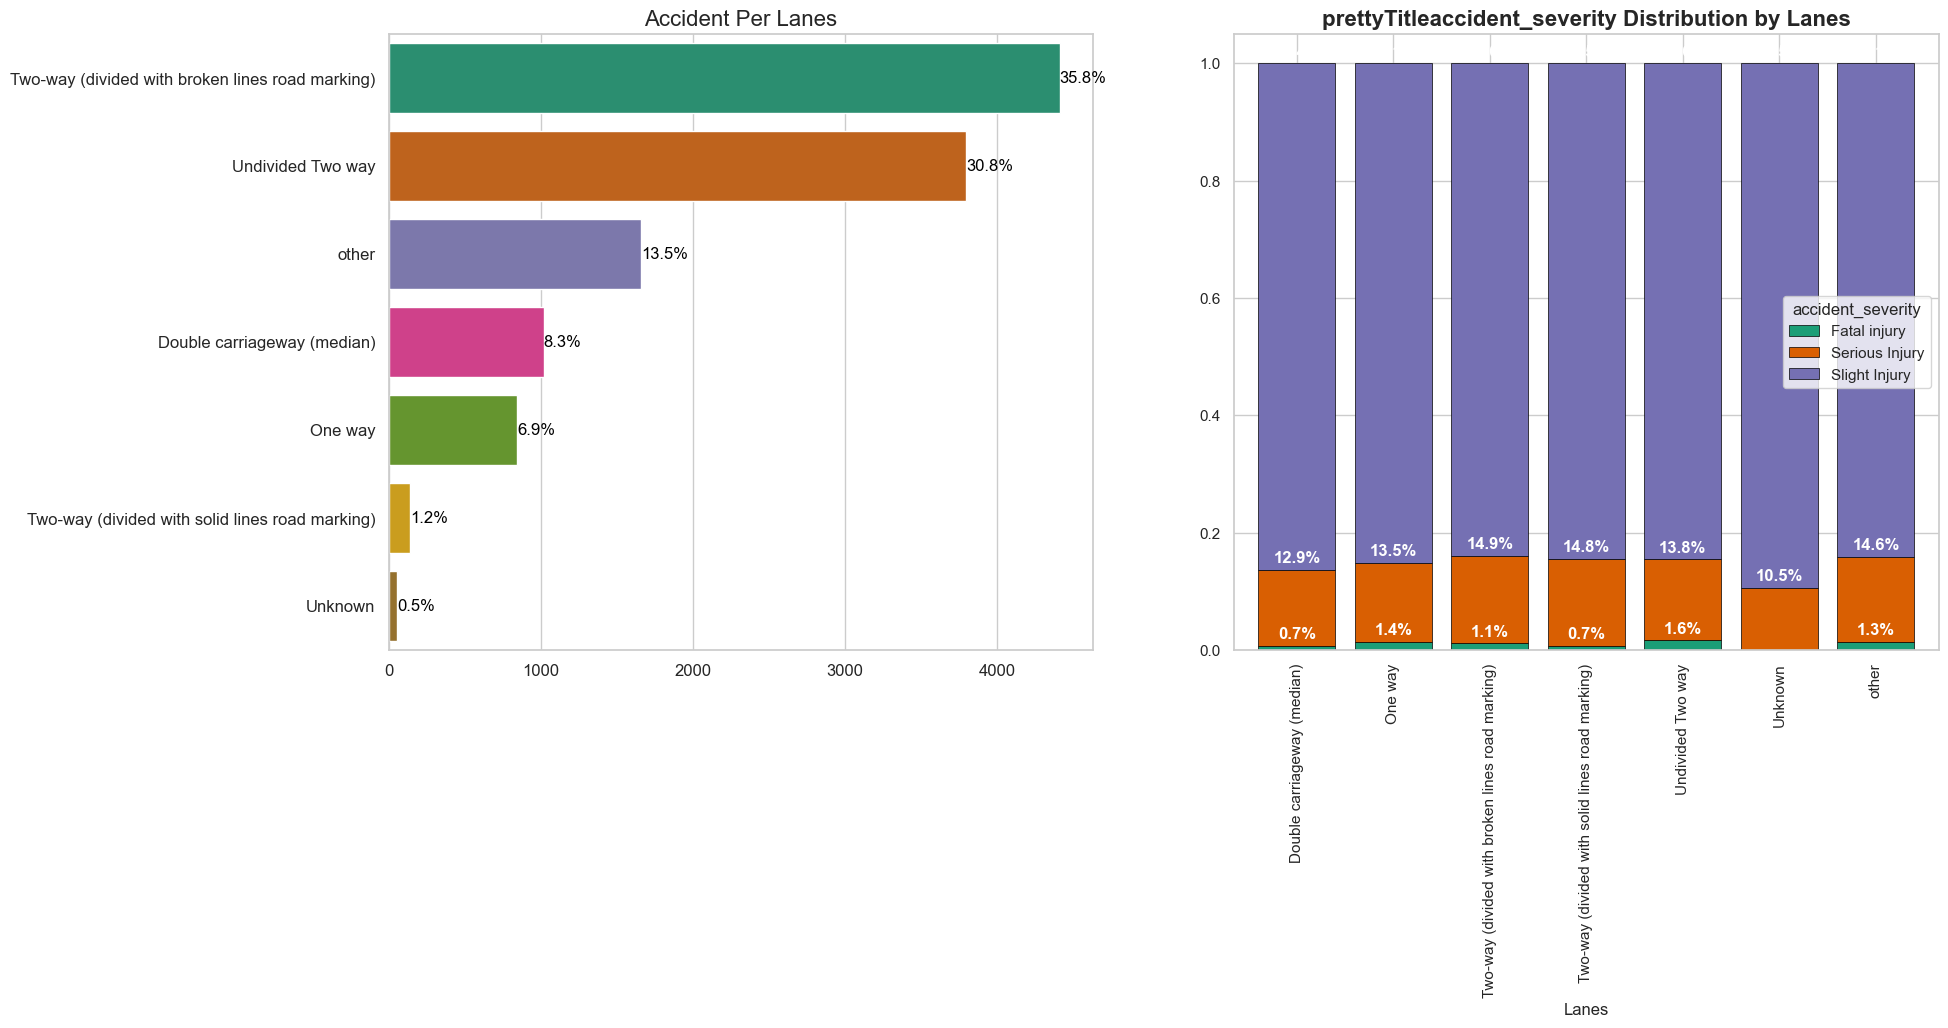

In [92]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
count_plot(df,'lanes',"Accident per Lanes",ax=ax[0])
histogram_plot(df,'lanes',hue='accident_severity',ax=ax[1])

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Lanes where most accidents occur:
* Two-way(divided with broken lines road marking)
* Undivided Two ways 

The severity proportions is fairly similar across lanes 
    
</div>

#### <i>Gender Constitution of Accidents<i>

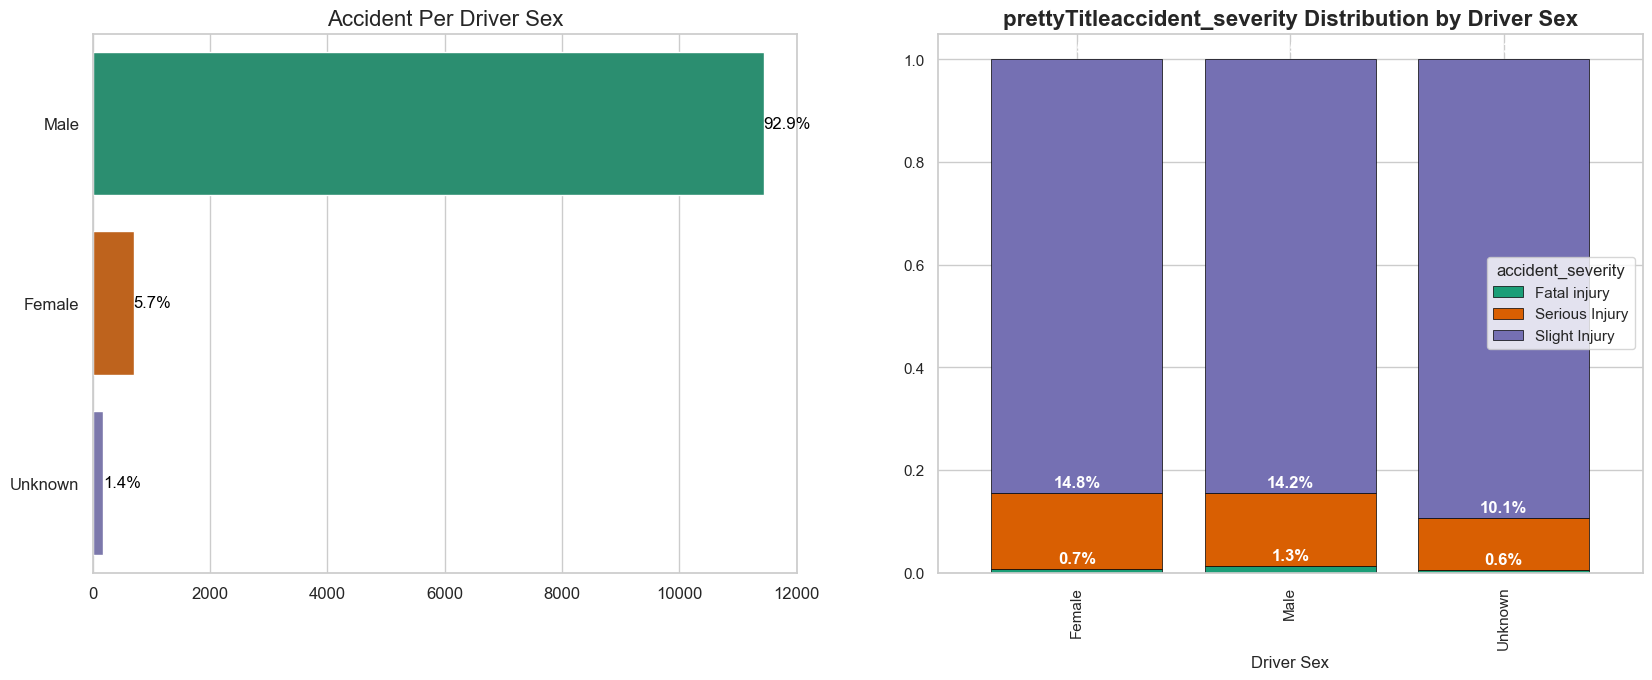

In [93]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
count_plot(df,'driver_sex','Accident per driver sex',ax=ax[0])
histogram_plot(df,'driver_sex',hue='accident_severity',ax=ax[1])

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Depending on the prior probability of a female driver, this may show that Male drivers are overwhelmingly prone to accident than women
    
</div>

In [94]:
#percentage of female drivers
total_female_drivers=len(df[df['driver_sex']=='Female'])
female_drivers_serious=len(df[df['driver_sex']=='Female'][df['accident_severity']=='Serious Injury'])
female_drivers_fatal=len(df[df['driver_sex']=='Female'][df['accident_severity']=='Fatal Injury'])
female_drivers_slight=len(df[df['driver_sex']=='Female'][df['accident_severity']=='Slight Injury'])
#percentage of male drivers
total_male_drivers=len(df[df['driver_sex']==  'Male'])
male_drivers_serious=len(df[df['driver_sex']=='Male'][df['accident_severity']=='Serious Injury'])
male_drivers_fatal=len(df[df['driver_sex'] == 'Male'][df['accident_severity']=='Fatal Injury'])
male_drivers_slight=len(df[df['driver_sex']== 'Male'][df['accident_severity']=='Slight Injury'])
#female probabilities
print(f'P( Fatal Accident   | Female)={(100*female_drivers_fatal/total_female_drivers):.2f}%')
print(f'P( Fatal Accident   | Male)={100*male_drivers_fatal/total_male_drivers:.2f}%')
print(f'P( Serious Accident | Female)={100*female_drivers_serious/total_female_drivers:.2f}%')
print(f'P( Serious Accident | Male)={100*male_drivers_serious/total_male_drivers:.2f}%')
print(f'P( Slight Accident  | Female)={100*female_drivers_slight/total_female_drivers:.2f}%')
print(f'P( Slight Accident  | Male)={100*male_drivers_slight/total_male_drivers:.2f}%')

P( Fatal Accident   | Female)=0.00%
P( Fatal Accident   | Male)=0.00%
P( Serious Accident | Female)=14.84%
P( Serious Accident | Male)=14.17%
P( Slight Accident  | Female)=84.45%
P( Slight Accident  | Male)=84.50%


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Eventhough the gender consitution of male drivers are higher than females, the severity of accidents involving female drivers is almost as bad as those of male drivers
    
</div>

#### <i>Age Constitution of Accidents<i>

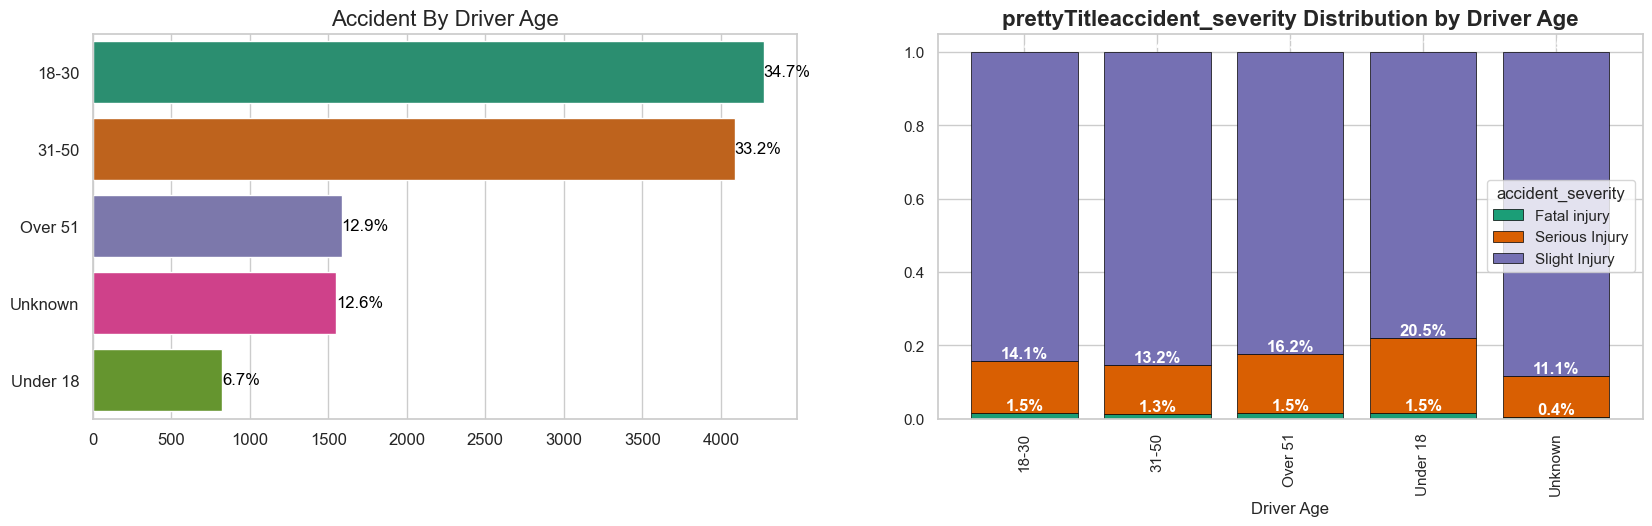

In [95]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
count_plot(df,'driver_age',"Accident by driver age",ax=ax[0])
histogram_plot(df,'driver_age',hue='accident_severity',ax=ax[1])

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Under age drivers have the highest percentage of serious accidents(20.5%)
* 31-50 year old drivers have the least percentage of serious accidents(13.2%) and fatality(1.3%)
</div>

### Driving Experience

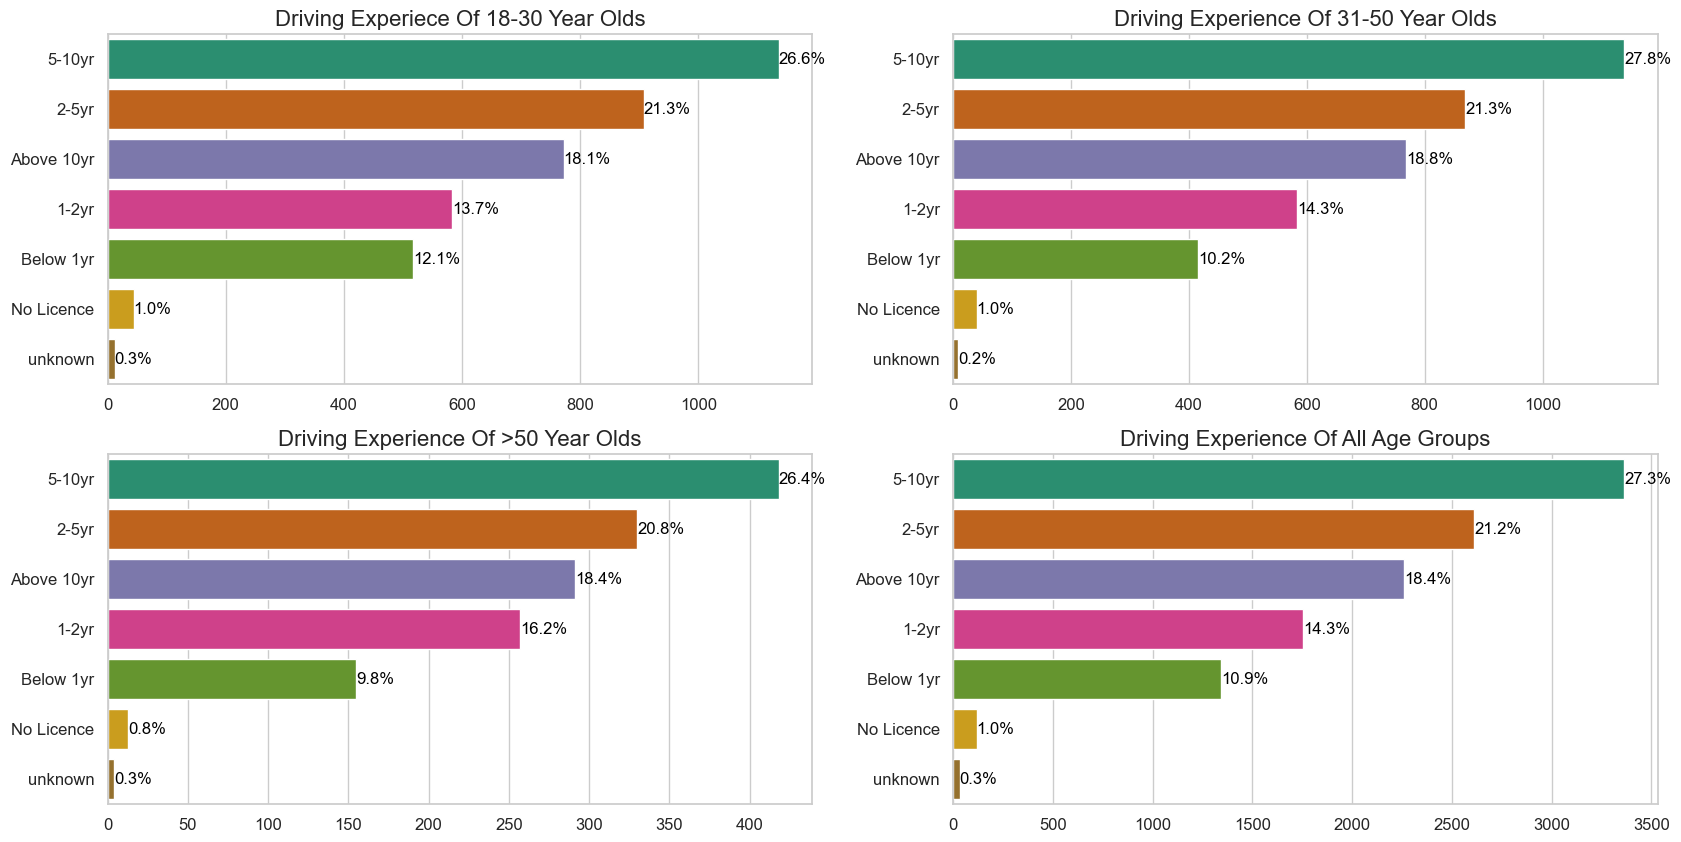

In [96]:
#Driving experience by driver_age
youth=df[df['driver_age']=='18-30']
adult=df[df['driver_age']=='31-50']
old=df[df['driver_age']=='Over 51']
fig,ax=plt.subplots(2,2,figsize=(20,10))
count_plot(youth,'driving_experience','Driving Experiece of 18-30 year olds',ax=ax[0,0])
count_plot(adult,'driving_experience','Driving Experience of 31-50 year olds',ax=ax[0,1])
count_plot(old,'driving_experience','Driving Experience of >50 year olds',ax=ax[1,0])
count_plot(df,'driving_experience','Driving Experience of all Age groups',ax=ax[1,1])


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* As the age of the driver increases the number of Accident goes down ,except for the under 18's that not allowed to drive in the first place and most probably constitute an insignificant portion
* Irrespective of the age groups number of accident increases with driving experience until it reaches 10 years, beyond which it begin to decline
</div>

KeyboardInterrupt: 

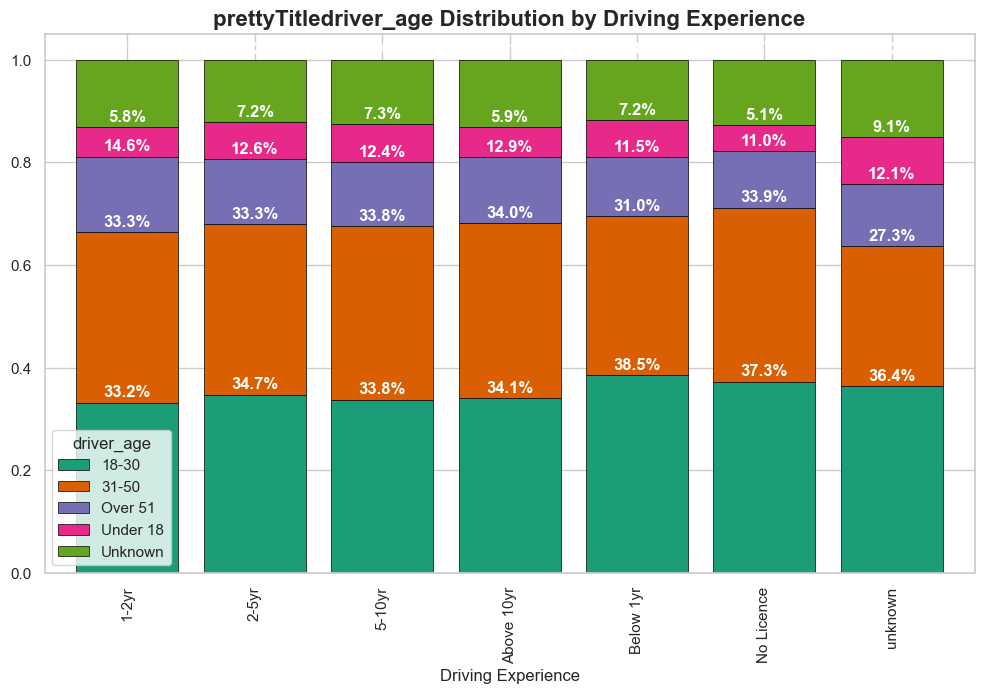

In [97]:
histogram_plot(df,'driving_experience',hue='driver_age')

KeyboardInterrupt: 

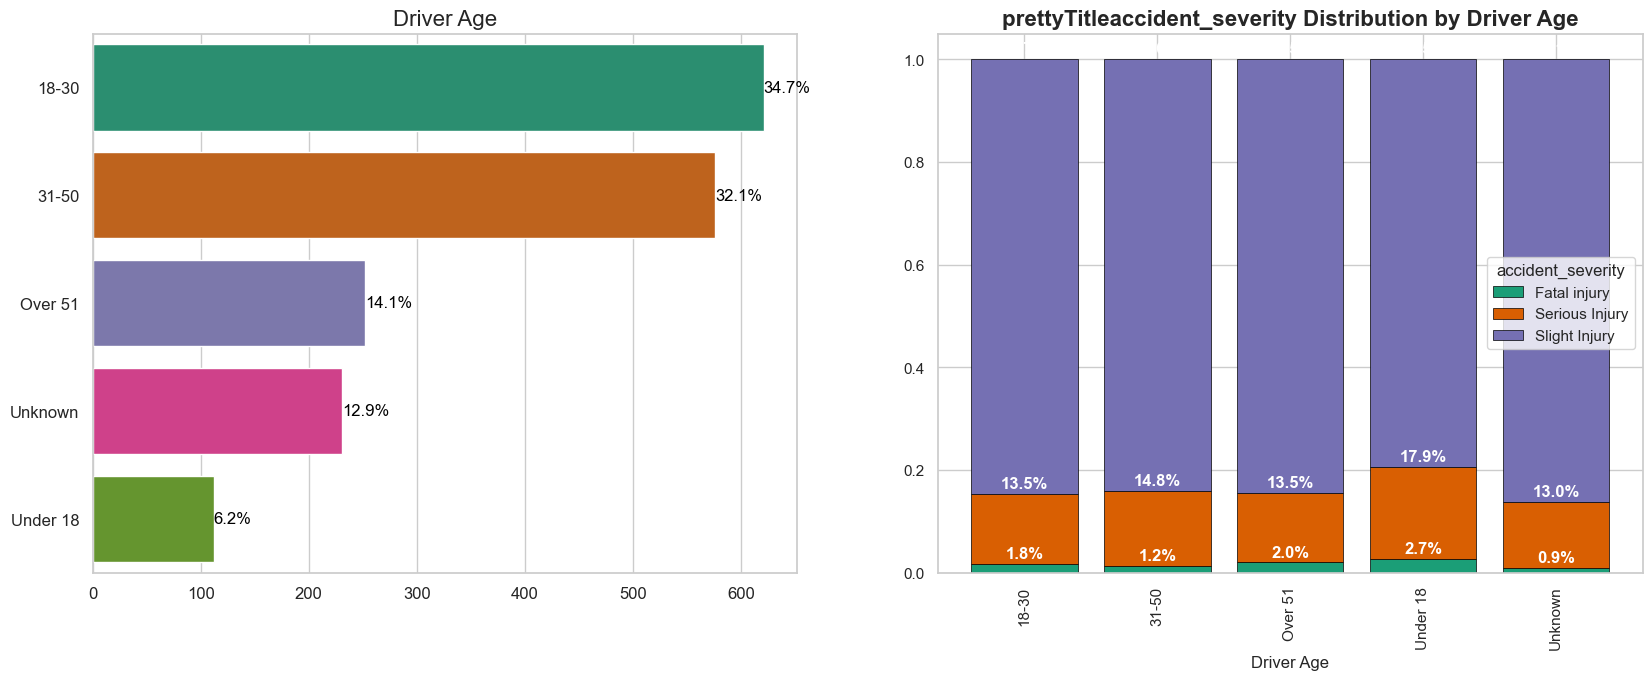

In [49]:
# looking at service_year from 2-5 yrs -what is the breakdown of this catergory like cause of accidents
fig,ax=plt.subplots(1,2,figsize=(20,7))
count_plot(df[df['service_year']=='2-5yrs'],'driver_age',"Driver Age",ordered=True,ax=ax[0])
histogram_plot(df[df['service_year']=='2-5yrs'],'driver_age',hue='accident_severity',ax=ax[1])

### Accident Severity Across Collision Types

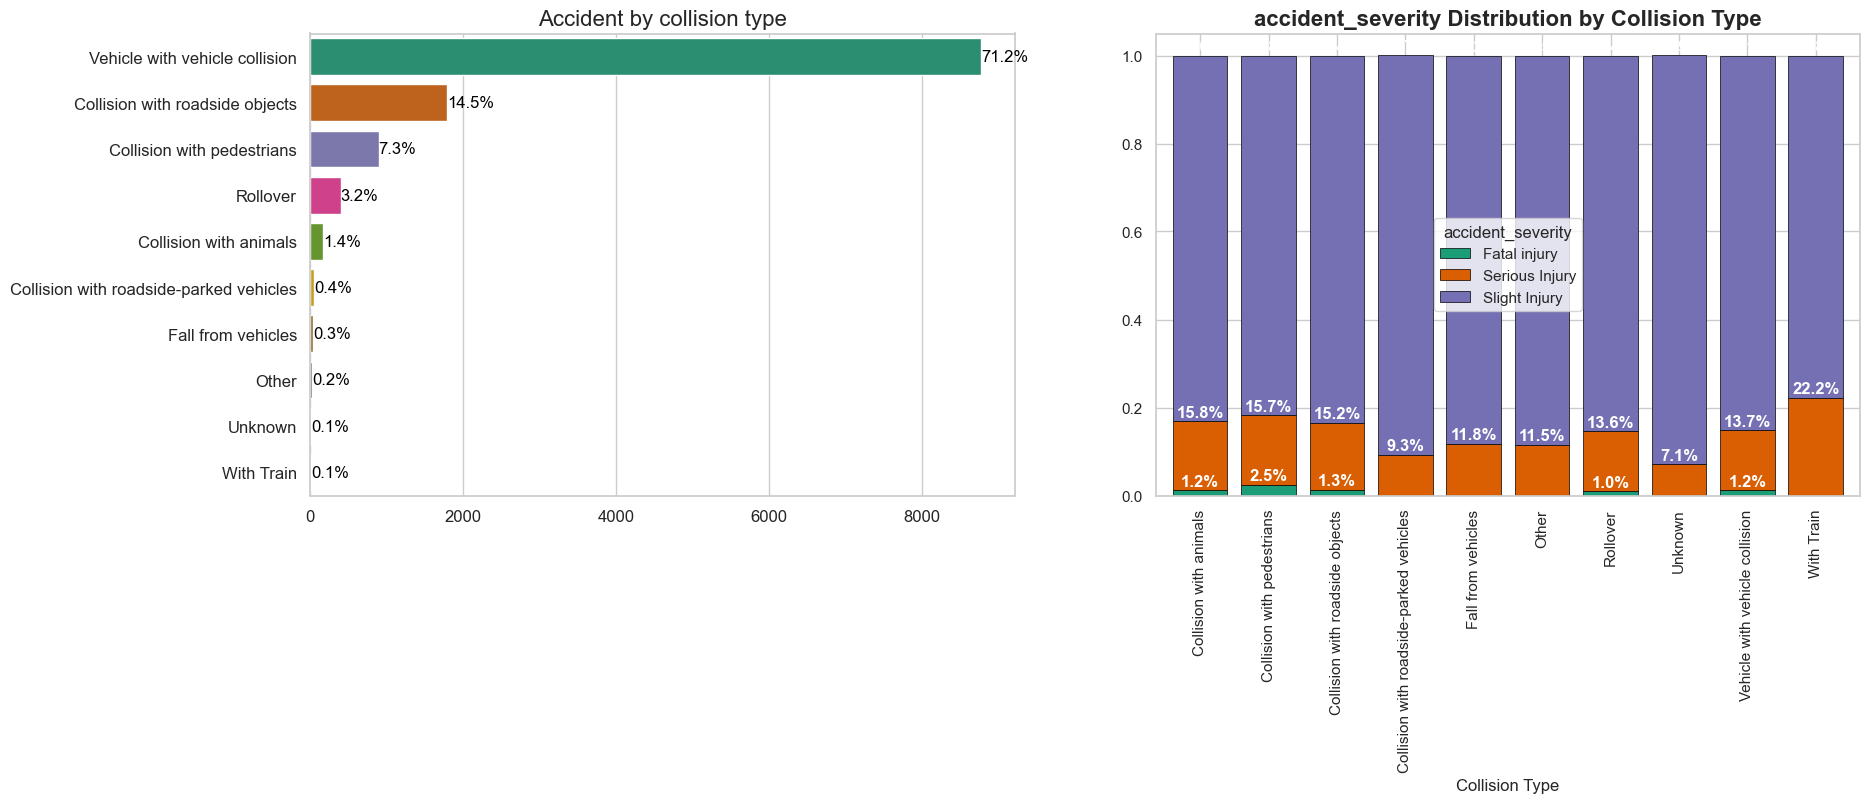

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
count_plot(df,'collision_type',title='Accident by collision type',ax=ax[0])
histogram_plot(df,'collision_type',hue='accident_severity',ax=ax[1])

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* The majority (71.2%) of accident are vehicle to vehicle collision between two vehicles
* Collision with Train consists of the highest percentage of serious injuries(22.3%)
* The highest percentage of fatality(2.5%) is recorded by collison with pedesterian( pedesterian being hit by a vehicle)
* Collision with road side parekd vehicle, fall from vehicle and collision with train have no fatalities
* The least percentage of serious accident(9.3%) is in collison with roadside-parked vehicles
    
</div>

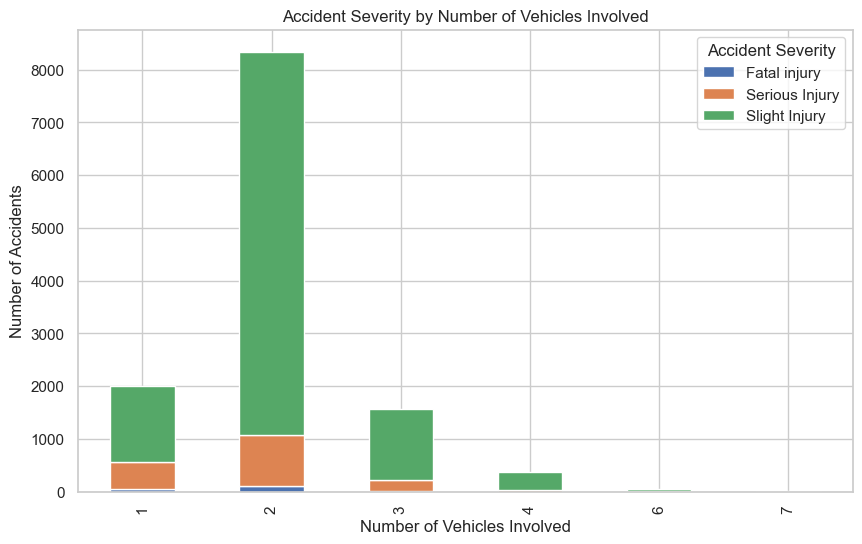

In [ ]:
# Create a pivot table to count accidents by severity and number of vehicles
pivot_table = df.groupby(['vehicles_involved', 'accident_severity']).size().unstack()
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6)) # Plot the stacked bar chart
plt.title('Accident Severity by Number of Vehicles Involved') # Customize the plot
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()

<a id='bivariate'></a>
### <i>Bivariate Analysis</i>
⬆️ [Tabel of Contents](#contents_tabel)

### Accident Severity vs. Accident Cause

In [ ]:
cross_tab=cross_tab_features(df,'accident_cause','accident_severity')
cross_tab

accident_severity                     Fatal injury  Serious Injury  \
accident_cause                                                       
Changing lane to the left                       16             206   
Changing lane to the right                      23             260   
Driving at high speed                            3              46   
Driving carelessly                              22             209   
Driving to the left                              4              53   
Driving under the influence of drugs             5              46   
Drunk driving                                    0               3   
Getting off the vehicle improperly               3              29   
Improper parking                                 1               2   
Moving Backward                                 26             162   
No distancing                                   20             303   
No priority to pedestrian                        5              95   
No priority to vehicle                          13             149   
Other                                            7              64   
Overloading                                      2              10   
Overtaking                                       4              75   
Overturning                                      4              29   
Unknown                                          0               2   
All                                            158            1743   

accident_severity                     Slight Injury    All  
accident_cause                                              
Changing lane to the left                      1251   1473  
Changing lane to the right                     1525   1808  
Driving at high speed                           186    235  
Driving carelessly                             1171   1402  
Driving to the left                             227    284  
Driving under the influence of drugs            289    340  
Drunk driving                                    24     27  
Getting off the vehicle improperly              165    197  
Improper parking                                 22     25  
Moving Backward                                 949   1137  
No distancing                                  1940   2263  
No priority to pedestrian                       621    721  
No priority to vehicle                         1045   1207  
Other                                           385    456  
Overloading                                      47     59  
Overtaking                                      351    430  
Overturning                                     194    227  
Unknown                                          23     25  
All                                           10415  12316

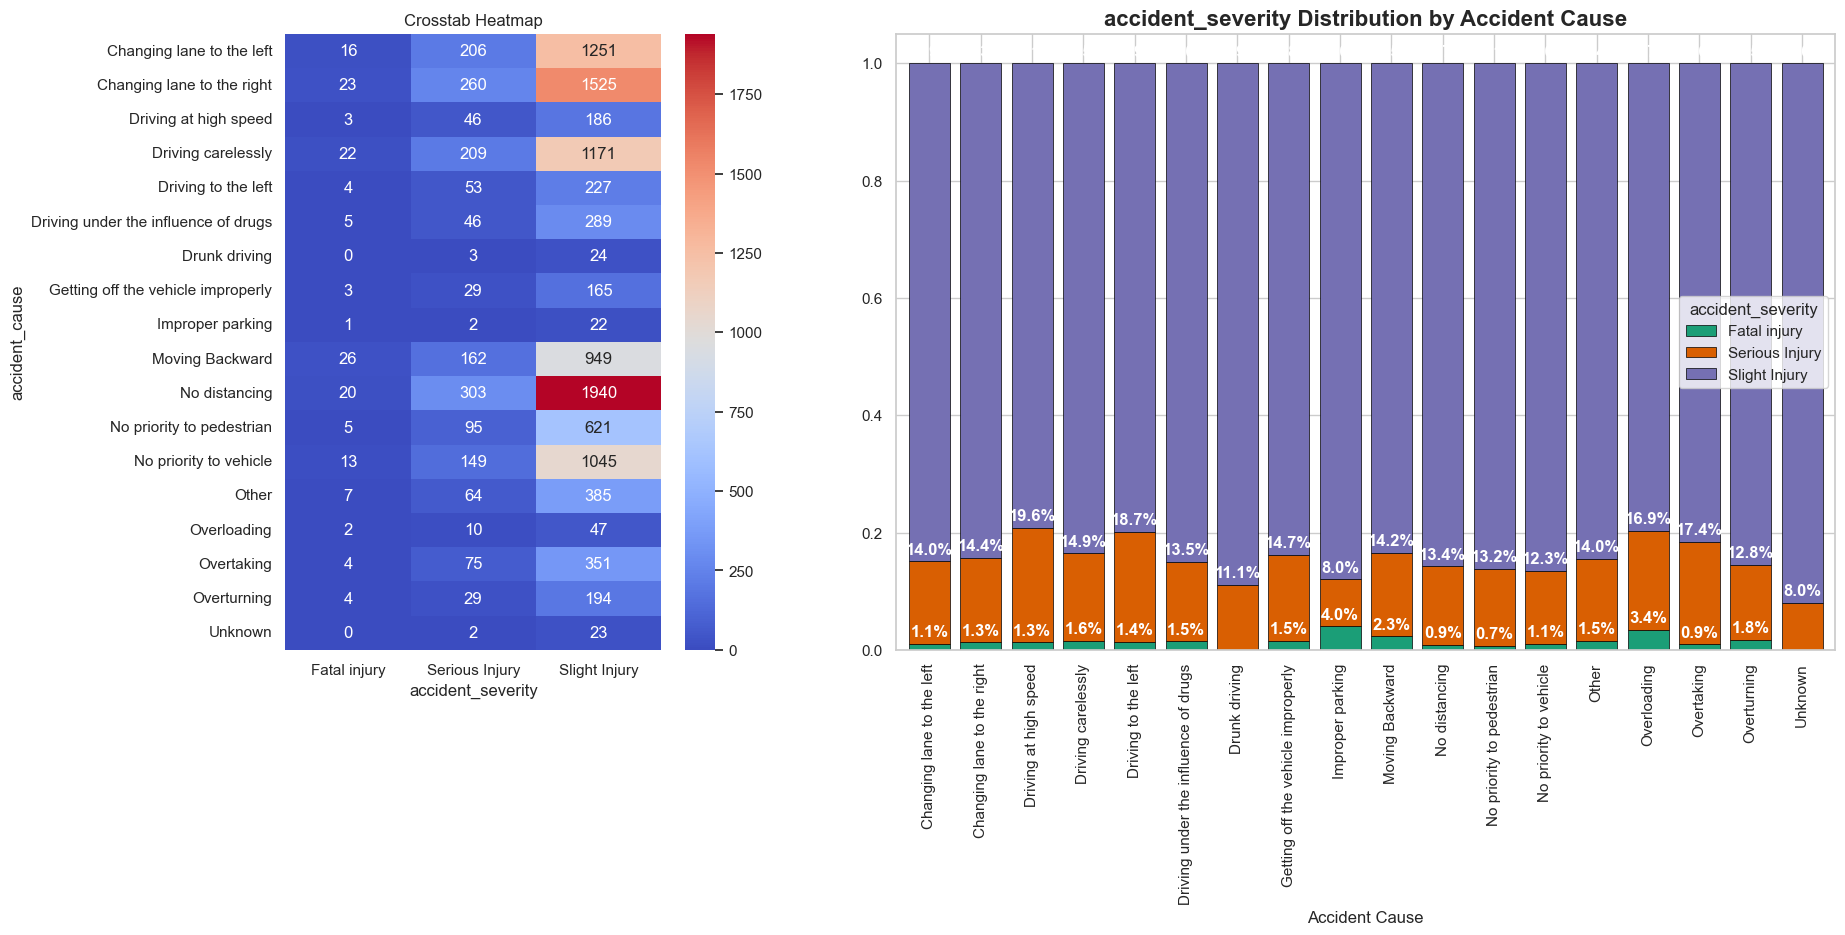

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,8),gridspec_kw={'width_ratios':[1,2]})
plot_crosstab(cross_tab,ax=ax[0])
histogram_plot(df,'accident_cause',hue='accident_severity',ax=ax[1])

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Accident Causes:
* Over Speeding has the highest proporition of serious accidents despite being one with the least cause of accidents by number
* No Fatalities were caused by drunk driving and it also has one the least propotion of serious accidents(11.1%) superceeded only by Improper parking(8.0%)
* Improper parking has the highest proportion of Fatalities (4%) followed by Overloading
    
</div>

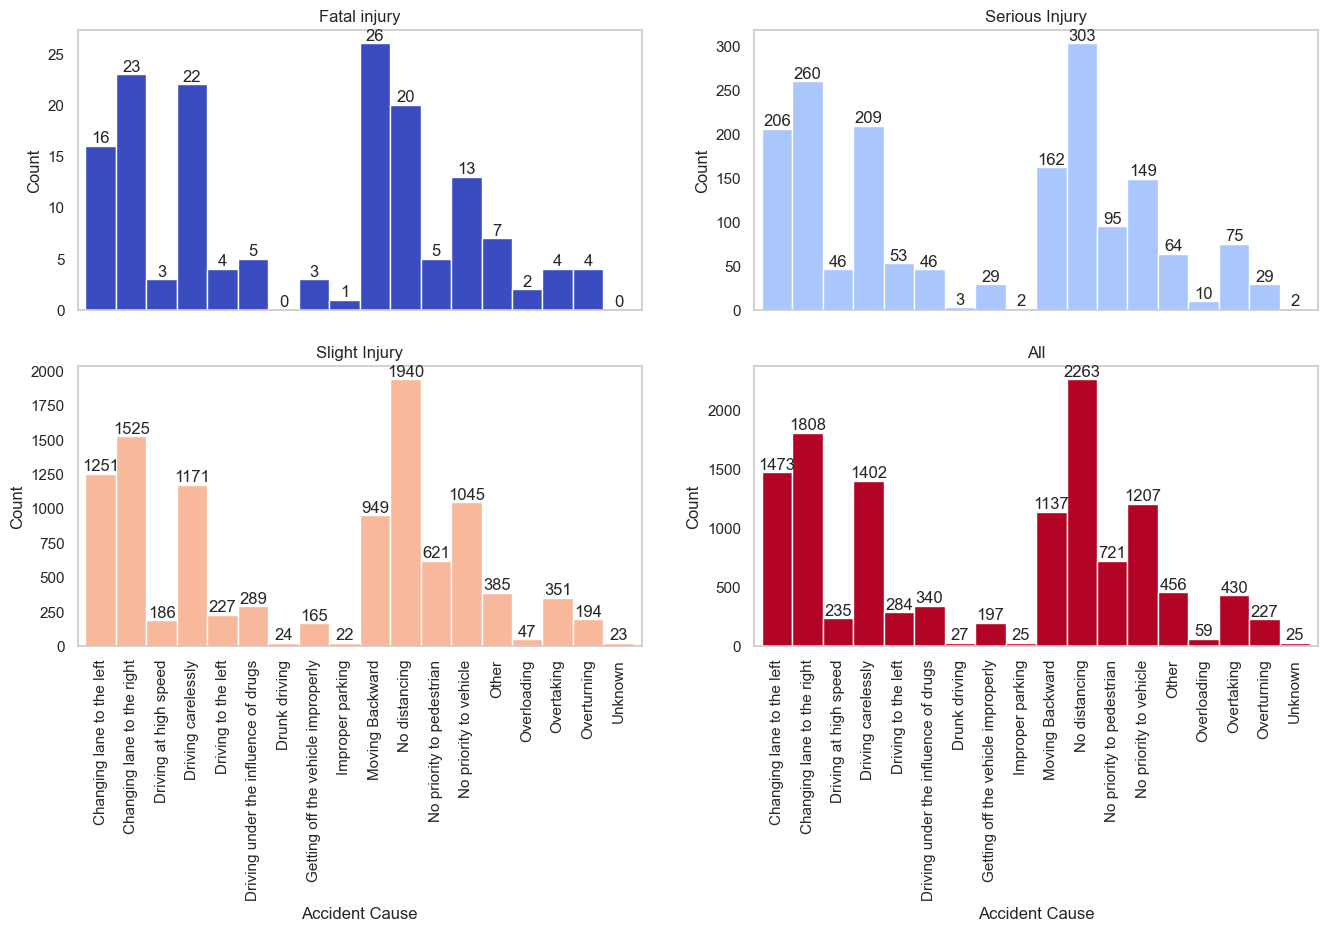

In [ ]:
#plot cross tab
cross_tab=cross_tab[cross_tab.index!='All']
num_columns = len(cross_tab.columns)
rows = 2  # Number of rows
cols = (num_columns + 1) // rows  # Calculate number of columns per row

# Create subplots
axes=cross_tab.plot(
    kind='bar',
    subplots=True,
    layout=(rows, cols),
    figsize=(16, 8),
    legend=False,
    colormap='coolwarm',
    width=1,
    grid=False
)
# Annotate each bar with its value
for ax in axes.flatten():  # Flatten the axes array to iterate over it
    for container in ax.containers:  # Iterate over bar containers
        ax.bar_label(container, fmt='%.0f')  # Add integer labels to each bar

# Add titles and labels for each subplot
for i, ax in enumerate(plt.gcf().axes):
    if i < num_columns:  # Avoid extra subplots from the grid
        ax.set_title(cross_tab.columns[i])
        ax.set_ylabel('Count')
        ax.set_xlabel('Accident Cause')



<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Accident Causes:
* Changing Lanes is the most prominent cause of accidents (merging changing Lanes to the right and to the left)
* No distancing is  the second most prominent cause of accidents followed by driving carelessly and no priority to vehicles
* Improper parking,<u>Drunk driving</u>, Overloading and <u>Overspeeding</u> are the least prominent causes of Accident
    
</div>

In [ ]:
cross_tab2=cross_tab_features(df,'service_year','accident_severity')
cross_tab2

accident_severity  Fatal injury  Serious Injury  Slight Injury   All
service_year                                                        
1-2yr                         9             111            707   827
2-5yrs                       28             253           1511  1792
5-10yrs                      16             191           1073  1280
Above 10yr                   12             186           1126  1324
Below 1yr                     6              43            233   282
Unknown                      44             408           2431  2883
All                         115            1192           7081  8388

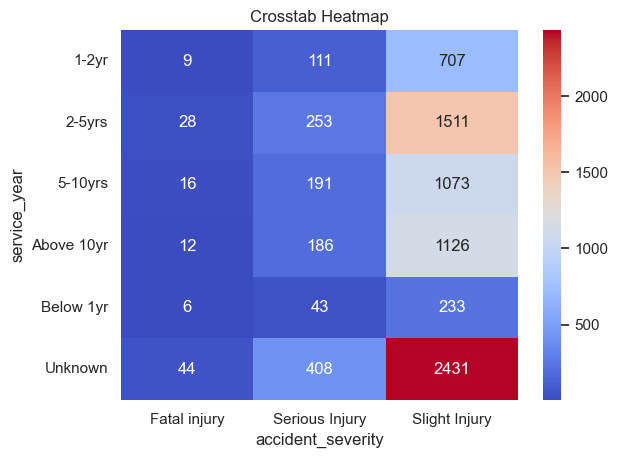

In [ ]:
plot_crosstab(cross_tab2)

In [57]:
df.columns

Index(['time', 'day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity'],
      dtype='object')

In [245]:
#spearman
Y=df['accident_severity']
for feature in ordinal_features:
    X=df[feature]
    rho, p_value = stats.spearmanr(X, Y)
    print(feature, rho,p_value)

driver_age 0.002628846909977342 0.7705055448301616
educational_level nan nan
driving_experience nan nan
service_year nan nan
casualty_age 0.024135080273840412 0.007393759605450161
casualty_severity 0.00694870149898055 0.4406592859414391
vehicle_defect nan nan
accident_severity 1.0 0.0


### <i>Multivariate Analysis</i>

<a id='preprocessing'></a>
# Preprocessing
⬆️ [Tabel of Contents](#contents_tabel)

### <i>Data Cleaning</i>

In [246]:
#copy data before any manipulation
df2=df.copy(deep=True)

<b>Converting values to numbers</b>

In [247]:
#time
df2['time']=pd.to_datetime(df2['time'],format='%H:%M:%S')
df2['hour']=df2['time'].dt.hour
df2['minute']=df2['time'].dt.minute
df2[['time','hour','minute']].head() #drop the time feature

df2=df2.drop(columns=['time'])

df2.dtypes

day_of_week                object
driver_age                 object
driver_sex                 object
educational_level          object
vehicle_driver_relation    object
driving_experience         object
vehicle_type               object
vehicle_owner              object
service_year               object
vehicle_defect             object
accident_area              object
lanes                      object
road_allignment            object
junction_type              object
surface_type               object
road_surface_conditions    object
light_condition            object
weather_condition          object
collision_type             object
vehicles_involved           int64
casualties                  int64
vehicle_movement           object
casualty_class             object
casualty_sex               object
casualty_age               object
casualty_severity          object
casualty_work              object
casualty_fitness           object
pedestrian_movement        object
accident_cause

In [248]:
#replace unknown, Unknown and na with np.nan
df2.replace(['na','unknown','Unknown'], np.nan, inplace=True)
for col in df2:
    print(df2[col].unique())

['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
['18-30' '31-50' 'Under 18' 'Over 51' nan]
['Male' 'Female' nan]
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
['Employee' nan 'Owner' 'Other']
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr']
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
['Owner' 'Governmental' nan 'Organization' 'Other']
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Below 1yr']
['0' nan '7' '5']
['Residential areas' 'Office areas' 'Recreational areas'
 'Industrial areas' nan 'Other' 'Church areas' 'Market areas'
 'Rural village areas' 'Outside rural areas' 'Hospital areas'
 'School areas']
[nan 'Undivided Two way' 'other' 'Double carriageway (median)' 

**Encoding**


In [249]:
#inspect ordinal feature values
for col in ordinal_features:
    print(col ," : ",df[col].unique())

driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
educational_level  :  ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
service_year  :  ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']
casualty_age  :  ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
casualty_severity  :  ['na' '3' '2' '1']
vehicle_defect  :  ['0' nan '7' '5']
accident_severity  :  ['Slight Injury' 'Serious Injury' 'Fatal injury']


In [250]:
#where casualty_age is equal to 5
df2[df2['casualty_age']==5]['casualty_age'].count()

np.int64(0)

In [251]:
#Create mappings and encode nominal features  in place
mappings = {}
for feature in nominal_features:
    unique_values = df2[feature].dropna().unique()
    mappings[feature] = {
        "original": {val: idx for idx, val in enumerate(unique_values)},
        "reverse": {idx: val for idx, val in enumerate(unique_values)}
    }
    df2[feature] = df2[feature].map(mappings[feature]["original"])
    df2.sample(10)


In [252]:
#Ordinal Encoding

df2[ordinal_features] = df2[ordinal_features].fillna('missing')
#dictate the order of values
category_order=[
['Under 18','18-30', '31-50', 'Over 51',  'missing'],
['Illiterate','Writing & reading','Elementary school', 'Junior high school','High school','Above high school', 'missing'],
['No Licence','Below 1yr', '1-2yr', '2-5yr', '5-10yr', 'Above 10yr','missing'],
['Below 1yr','1-2yr', '2-5yrs', '5-10yrs', 'Above 10yr',  'missing'],
['Under 18','18-30', '31-50', 'Over 51','5', 'missing'],
['1','2','3','missing'],
['0','5','7','missing'],
['Slight Injury', 'Serious Injury' ,'Fatal injury']
]
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories=category_order)
df2[ordinal_features]=encoder.fit_transform(df2[ordinal_features])
missing_encoded_value = encoder.transform([['missing'] * len(ordinal_features)])[0]
for i, col in enumerate(ordinal_features):
     df2[col] = df2[col].replace(missing_encoded_value[i], np.nan)
encoded_df=df2.copy(deep=True)

encoded_df.sample(5)

day_of_week  driver_age  driver_sex  educational_level  \
10134            6         2.0         0.0                3.0   
7974             5         1.0         0.0                2.0   
9093             4         0.0         0.0                2.0   
3099             3         1.0         0.0                3.0   
7682             0         2.0         0.0                4.0   

       vehicle_driver_relation  driving_experience  vehicle_type  \
10134                      0.0                 3.0           0.0   
7974                       1.0                 4.0           9.0   
9093                       0.0                 2.0           0.0   
3099                       1.0                 5.0           4.0   
7682                       1.0                 5.0           0.0   

       vehicle_owner  service_year  vehicle_defect  ...  casualty_sex  \
10134            0.0           2.0             NaN  ...           NaN   
7974             0.0           NaN             0.0  ...           0.0   
9093             0.0           4.0             0.0  ...           0.0   
3099             0.0           3.0             NaN  ...           0.0   
7682             0.0           3.0             NaN  ...           NaN   

       casualty_age  casualty_severity  casualty_work  casualty_fitness  \
10134           NaN                NaN            NaN               NaN   
7974            2.0                2.0            0.0               0.0   
9093            4.0                2.0            4.0               0.0   
3099            1.0                2.0            4.0               0.0   
7682            NaN                NaN            4.0               0.0   

       pedestrian_movement  accident_cause  accident_severity  hour  minute  
10134                    0            12.0                1.0    13       9  
7974                     2             3.0                0.0    21      10  
9093                     0             0.0                0.0    16      20  
3099                     0             5.0                1.0     7      25  
7682                     0             8.0                0.0    14      50  

[5 rows x 33 columns]

In [253]:
# Check the mappings
for feature, categories in zip(ordinal_features, encoder.categories_):
    print(f"Feature: {feature}")
    print(f"{dict(zip(categories, range(len(categories))))}")

Feature: driver_age
{'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, 'missing': 4}
Feature: educational_level
{'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2, 'Junior high school': 3, 'High school': 4, 'Above high school': 5, 'missing': 6}
Feature: driving_experience
{'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4, 'Above 10yr': 5, 'missing': 6}
Feature: service_year
{'Below 1yr': 0, '1-2yr': 1, '2-5yrs': 2, '5-10yrs': 3, 'Above 10yr': 4, 'missing': 5}
Feature: casualty_age
{'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, '5': 4, 'missing': 5}
Feature: casualty_severity
{'1': 0, '2': 1, '3': 2, 'missing': 3}
Feature: vehicle_defect
{'0': 0, '5': 1, '7': 2, 'missing': 3}
Feature: accident_severity
{'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2}


<a id='imputation'></a>
### Impute Missing Values
⬆️ [Tabel of Contents](#contents_tabel)

In [254]:
# imputed iteratively using Random Forest Classiffier as an estimator
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
imputer = IterativeImputer(estimator=rf, random_state=0)
imputed_data = imputer.fit_transform(encoded_df)
imputed_df = pd.DataFrame(imputed_data, columns=df2.columns)
imputed_df.sample(5)


day_of_week  driver_age  driver_sex  educational_level  \
5181          3.0         1.0         0.0                3.0   
7583          0.0         1.0         0.0                3.0   
7691          4.0         2.0         0.0                3.0   
447           0.0         3.0         0.0                4.0   
408           0.0         3.0         0.0                3.0   

      vehicle_driver_relation  driving_experience  vehicle_type  \
5181                      0.0                 4.0           2.0   
7583                      1.0                 3.0           0.0   
7691                      0.0                 0.0           3.0   
447                       1.0                 2.0           0.0   
408                       1.0                 2.0           9.0   

      vehicle_owner  service_year  vehicle_defect  ...  casualty_sex  \
5181            0.0           3.0             0.0  ...           0.0   
7583            0.0           3.0             2.0  ...           1.0   
7691            0.0           4.0             0.0  ...           0.0   
447             0.0           2.0             0.0  ...           1.0   
408             0.0           2.0             0.0  ...           0.0   

      casualty_age  casualty_severity  casualty_work  casualty_fitness  \
5181           1.0                2.0            0.0               0.0   
7583           1.0                2.0            1.0               0.0   
7691           2.0                2.0            0.0               0.0   
447            0.0                2.0            0.0               0.0   
408            1.0                2.0            4.0               0.0   

      pedestrian_movement  accident_cause  accident_severity  hour  minute  
5181                  0.0             3.0                0.0  12.0    34.0  
7583                  1.0             7.0                1.0  16.0    30.0  
7691                  0.0            12.0                0.0  17.0     9.0  
447                   0.0             8.0                0.0   9.0    55.0  
408                   0.0             6.0                0.0  15.0    31.0  

[5 rows x 33 columns]

In [255]:
for feature in imputed_df:
    print( feature ," :",len(imputed_df[feature].unique()))

day_of_week  : 7
driver_age  : 4
driver_sex  : 2
educational_level  : 6
vehicle_driver_relation  : 3
driving_experience  : 6
vehicle_type  : 17
vehicle_owner  : 4
service_year  : 5
vehicle_defect  : 3
accident_area  : 11
lanes  : 6
road_allignment  : 9
junction_type  : 7
surface_type  : 5
road_surface_conditions  : 4
light_condition  : 4
weather_condition  : 8
collision_type  : 9
vehicles_involved  : 6
casualties  : 8
vehicle_movement  : 12
casualty_class  : 3
casualty_sex  : 2
casualty_age  : 5
casualty_severity  : 3
casualty_work  : 6
casualty_fitness  : 5
pedestrian_movement  : 9
accident_cause  : 17
accident_severity  : 3
hour  : 24
minute  : 60


In [256]:
#decoding nominal features
ndecoded_df=imputed_df.copy(deep=True)
for feature in nominal_features:
    reverse_map = mappings[feature]["reverse"]
    valid_values = list(reverse_map.keys())
  
    # Round imputed values to the nearest valid integer
    ndecoded_df[feature] = ndecoded_df[feature].apply(
        lambda x: min(valid_values, key=lambda y: abs(x - y))
    )
    # Decode back to original categories
    ndecoded_df[feature] = ndecoded_df[feature].map(reverse_map)

ndecoded_df.sample(5)

day_of_week  driver_age driver_sex  educational_level  \
3922    Wednesday         1.0       Male                3.0   
1961     Thursday         1.0       Male                3.0   
3629       Monday         3.0       Male                3.0   
3119       Friday         1.0       Male                3.0   
12048    Saturday         0.0       Male                3.0   

      vehicle_driver_relation  driving_experience      vehicle_type  \
3922                 Employee                 5.0  Pick up upto 10Q   
1961                 Employee                 4.0        Automobile   
3629                 Employee                 5.0      Stationwagen   
3119                 Employee                 1.0        Automobile   
12048                Employee                 2.0      Stationwagen   

      vehicle_owner  service_year  vehicle_defect  ... casualty_sex  \
3922          Owner           1.0             0.0  ...         Male   
1961          Owner           2.0             0.0  ...         Male   
3629          Owner           4.0             0.0  ...         Male   
3119          Owner           2.0             0.0  ...         Male   
12048  Governmental           1.0             0.0  ...         Male   

      casualty_age casualty_severity casualty_work casualty_fitness  \
3922           1.0               2.0        Driver           Normal   
1961           2.0               2.0        Driver           Normal   
3629           2.0               2.0        Driver           Normal   
3119           3.0               2.0        Driver           Normal   
12048          1.0               2.0        Driver           Normal   

      pedestrian_movement              accident_cause accident_severity  hour  \
3922     Not a Pedestrian             Moving Backward               1.0  18.0   
1961     Not a Pedestrian  Changing lane to the right               0.0  17.0   
3629     Not a Pedestrian               No distancing               0.0   9.0   
3119     Not a Pedestrian                       Other               0.0   6.0   
12048    Not a Pedestrian   No priority to pedestrian               0.0   3.0   

       minute  
3922     25.0  
1961     55.0  
3629     10.0  
3119     47.0  
12048    32.0  

[5 rows x 33 columns]

In [257]:
# Decode Ordinal Features
ordinal_decoded = encoder.inverse_transform(ndecoded_df[ordinal_features])
for i, col in enumerate(ordinal_features):
    ndecoded_df[col] = ordinal_decoded[:, i]
ndecoded_df.sample(5)

day_of_week driver_age driver_sex   educational_level  \
1674       Sunday   Under 18       Male  Junior high school   
11485      Friday      31-50       Male  Junior high school   
807        Monday    Over 51       Male  Junior high school   
9898     Saturday      18-30       Male  Junior high school   
11811      Sunday    Over 51       Male   Elementary school   

      vehicle_driver_relation driving_experience      vehicle_type  \
1674                 Employee          Below 1yr      Stationwagen   
11485                Employee              1-2yr        Automobile   
807                  Employee              2-5yr             Other   
9898                 Employee              1-2yr      Stationwagen   
11811                   Owner             5-10yr  Pick up upto 10Q   

      vehicle_owner service_year vehicle_defect  ... casualty_sex  \
1674          Owner        1-2yr              0  ...         Male   
11485         Owner       2-5yrs              0  ...       Female   
807           Owner       2-5yrs              0  ...         Male   
9898          Owner       2-5yrs              0  ...       Female   
11811         Owner       2-5yrs              0  ...         Male   

      casualty_age casualty_severity  casualty_work casualty_fitness  \
1674         18-30                 3         Driver           Normal   
11485            5                 3         Driver           Normal   
807          18-30                 3         Driver           Normal   
9898         18-30                 3         Driver           Normal   
11811        18-30                 3  Self-employed           Normal   

      pedestrian_movement             accident_cause accident_severity  hour  \
1674     Not a Pedestrian  No priority to pedestrian     Slight Injury   8.0   
11485    Not a Pedestrian         Driving carelessly     Slight Injury  16.0   
807      Not a Pedestrian              No distancing     Slight Injury  13.0   
9898     Not a Pedestrian  No priority to pedestrian     Slight Injury  12.0   
11811    Not a Pedestrian              No distancing     Slight Injury  11.0   

       minute  
1674     40.0  
11485    55.0  
807       5.0  
9898      0.0  
11811    43.0  

[5 rows x 33 columns]

In [258]:
#check correct decoding
ndecoded_df['casualty_class'].isna().sum()
for col in ndecoded_df:
    print(col ," : ",ndecoded_df[col].unique())
imputed_decoded_df=ndecoded_df.copy(deep=True)

day_of_week  :  ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51']
driver_sex  :  ['Male' 'Female']
educational_level  :  ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
vehicle_driver_relation  :  ['Employee' 'Owner' 'Other']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']
vehicle_type  :  ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
vehicle_owner  :  ['Owner' 'Governmental' 'Organization' 'Other']
service_year  :  ['Above 10yr' '5-10yrs' '2-5yrs' '1-2yr' 'Below 1yr']
vehicle_defect  :  ['0' '7' '5']
accident_area  :  ['Residential areas' 'Office areas' 'Recreational areas'
 'Industrial areas' 'Other' 'Chu

In [259]:
#save imputed_data
cleaned_df=imputed_decoded_df.copy(deep=True)
folder_path = "data"
file_name = "cleaned_data.csv" # Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, file_name) # Full path to the CSV file
cleaned_df.to_csv(file_path, index=False) # Save DataFrame to CSV (replace if it already exists)
print(f"File saved at: {file_path}")

File saved at: data\cleaned_data.csv


### Spearman’s Rank Correlation

In [260]:
#spearman
coeff=pd.DataFrame(columns=["rho","p_value"])
Y=imputed_df['accident_severity']
for feature in ordinal_features:
    X=imputed_df[feature]
    rho, p_value = stats.spearmanr(X, Y)
    coeff.loc[feature]=[rho,p_value]
coeff

rho   p_value
driver_age         -0.007709  0.392283
educational_level  -0.002709  0.763683
driving_experience  0.003426  0.703817
service_year        0.000743  0.934260
casualty_age        0.003785  0.674497
casualty_severity   0.010897  0.226587
vehicle_defect      0.005817  0.518580
accident_severity   1.000000  0.000000

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939 background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Ordinal Features correlation with Accident Severity:
* Driver Age (-0.008) and Educational Level (-0.0027) have very weak negative correlations with accinent severity.
* Driving Experience (0.0036) and Casualty Age (0.0031) have very weak positive correlations.
* The correlation values are close to zero, suggesting that there is no strong monotonic relationship with the respective variable.
* For driver_age, educational_level, driving_experience, service_year, and casualty_age, the p-values are greater than 0.05, which means none of these relationships are statistically significant.
    
</div>

<a id='transform'></a>
### <i>Data Transformation</i>
⬆️ [Tabel of Contents](#contents_tabel)

#### Time Feature Transformation

In [261]:
# Cyclical Encoding of Time Features
cyclical_df=imputed_df.copy(deep=True)
cyclical_df['fractional_hour']=cyclical_df['hour']+cyclical_df['minute']/60  #merge hour and minute for better granularity
cyclical_df['hour_sin'] = np.sin(2 * np.pi * cyclical_df['fractional_hour'] / 24)
cyclical_df['hour_cos'] = np.cos(2 * np.pi * cyclical_df['fractional_hour'] / 24)
cyclical_df=cyclical_df.drop(columns=['fractional_hour','hour','minute'])
cyclical_df


day_of_week  driver_age  driver_sex  educational_level  \
0              0.0         1.0         0.0                5.0   
1              0.0         2.0         0.0                3.0   
2              0.0         1.0         0.0                3.0   
3              1.0         1.0         0.0                3.0   
4              1.0         1.0         0.0                3.0   
...            ...         ...         ...                ...   
12311          3.0         2.0         0.0                3.0   
12312          1.0         1.0         0.0                2.0   
12313          1.0         3.0         0.0                3.0   
12314          1.0         1.0         1.0                3.0   
12315          1.0         1.0         0.0                3.0   

       vehicle_driver_relation  driving_experience  vehicle_type  \
0                          0.0                 2.0           0.0   
1                          0.0                 5.0           1.0   
2                          0.0                 2.0           2.0   
3                          0.0                 4.0           1.0   
4                          0.0                 3.0           0.0   
...                        ...                 ...           ...   
12311                      0.0                 3.0           4.0   
12312                      0.0                 4.0           0.0   
12313                      0.0                 4.0          12.0   
12314                      0.0                 5.0           2.0   
12315                      0.0                 4.0          11.0   

       vehicle_owner  service_year  vehicle_defect  ...  casualty_sex  \
0                0.0           4.0             0.0  ...           0.0   
1                0.0           3.0             0.0  ...           0.0   
2                0.0           2.0             0.0  ...           0.0   
3                1.0           2.0             0.0  ...           1.0   
4                0.0           3.0             0.0  ...           0.0   
...              ...           ...             ...  ...           ...   
12311            0.0           2.0             0.0  ...           0.0   
12312            0.0           2.0             0.0  ...           0.0   
12313            0.0           2.0             0.0  ...           0.0   
12314            0.0           2.0             0.0  ...           0.0   
12315            0.0           2.0             0.0  ...           1.0   

       casualty_age  casualty_severity  casualty_work  casualty_fitness  \
0               1.0                2.0            0.0               0.0   
1               1.0                2.0            0.0               0.0   
2               2.0                2.0            0.0               0.0   
3               1.0                2.0            0.0               0.0   
4               1.0                2.0            0.0               0.0   
...             ...                ...            ...               ...   
12311           1.0                2.0            0.0               0.0   
12312           1.0                2.0            0.0               0.0   
12313           2.0                2.0            0.0               0.0   
12314           1.0                2.0            0.0               0.0   
12315           4.0                2.0            0.0               0.0   

       pedestrian_movement  accident_cause  accident_severity  hour_sin  \
0                      0.0             0.0                0.0 -0.968148   
1                      0.0             1.0                0.0 -0.968148   
2                      0.0             2.0                1.0 -0.968148   
3                      0.0             3.0                0.0  0.284015   
4                      0.0             1.0                0.0  0.284015   
...                    ...             ...                ...       ...   
12311                  0.0             8.0                0.0 -0.896873   
12312                  0.0     

#### Normalization

In [262]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(cyclical_df)
scaled_df=pd.DataFrame(scaled_data,columns=cyclical_df.columns)
scaled_df['accident_severity']=imputed_df['accident_severity']
scaled_df


day_of_week  driver_age  driver_sex  educational_level  \
0         0.000000    0.333333         0.0                1.0   
1         0.000000    0.666667         0.0                0.6   
2         0.000000    0.333333         0.0                0.6   
3         0.166667    0.333333         0.0                0.6   
4         0.166667    0.333333         0.0                0.6   
...            ...         ...         ...                ...   
12311     0.500000    0.666667         0.0                0.6   
12312     0.166667    0.333333         0.0                0.4   
12313     0.166667    1.000000         0.0                0.6   
12314     0.166667    0.333333         1.0                0.6   
12315     0.166667    0.333333         0.0                0.6   

       vehicle_driver_relation  driving_experience  vehicle_type  \
0                          0.0                 0.4        0.0000   
1                          0.0                 1.0        0.0625   
2                          0.0                 0.4        0.1250   
3                          0.0                 0.8        0.0625   
4                          0.0                 0.6        0.0000   
...                        ...                 ...           ...   
12311                      0.0                 0.6        0.2500   
12312                      0.0                 0.8        0.0000   
12313                      0.0                 0.8        0.7500   
12314                      0.0                 1.0        0.1250   
12315                      0.0                 0.8        0.6875   

       vehicle_owner  service_year  vehicle_defect  ...  casualty_sex  \
0           0.000000          1.00             0.0  ...           0.0   
1           0.000000          0.75             0.0  ...           0.0   
2           0.000000          0.50             0.0  ...           0.0   
3           0.333333          0.50             0.0  ...           1.0   
4           0.000000          0.75             0.0  ...           0.0   
...              ...           ...             ...  ...           ...   
12311       0.000000          0.50             0.0  ...           0.0   
12312       0.000000          0.50             0.0  ...           0.0   
12313       0.000000          0.50             0.0  ...           0.0   
12314       0.000000          0.50             0.0  ...           0.0   
12315       0.000000          0.50             0.0  ...           1.0   

       casualty_age  casualty_severity  casualty_work  casualty_fitness  \
0              0.25                1.0            0.0               0.0   
1              0.25                1.0            0.0               0.0   
2              0.50                1.0            0.0               0.0   
3              0.25                1.0            0.0               0.0   
4              0.25                1.0            0.0               0.0   
...             ...                ...            ...               ...   
12311          0.25                1.0            0.0               0.0   
12312          0.25                1.0            0.0               0.0   
12313          0.50                1.0            0.0               0.0   
12314          0.25                1.0            0.0               0.0   
12315          1.00                1.0            0.0               0.0   

       pedestrian_movement  accident_cause  accident_severity  hour_sin  \
0                     0.00          0.0000                0.0  0.015926   
1                     0.00          0.0625                0.0  0.015926   
2                     0.00          0.1250                1.0  0.015926   
3                     0.00          0.1875                0.0  0.642008   
4                     0.00          0.0625                0.0  0.642008   
...                    ...             ...                ...       ...   
12311                 0.00          0.5000                0.0  0.051564   
12312                 0.00     

<a id='reduce'></a>
### <i>Data Reduction</i>
⬆️ [Tabel of Contents](#contents_tabel)

### Attribute Subset Selection Using Filter Methods

#### Mutual Information

In [263]:
#Mutual Information
target = "accident_severity"
mi = mutual_info_classif(scaled_df.drop(columns=[target,*numerical_columns]), scaled_df["accident_severity"], discrete_features=True)
mi_scaled = MinMaxScaler().fit_transform(mi.reshape(-1, 1)).flatten() # Normalize MI values
mi_df = pd.DataFrame({
    'Feature': scaled_df.drop(columns=[target,*numerical_columns]).columns,
    'Mutual Information': mi_scaled
})
mi_df.sort_values(by='Mutual Information',ascending=False)

Feature  Mutual Information
29                 hour_cos            1.000000
28                 hour_sin            0.991568
13            junction_type            0.022198
17        weather_condition            0.014850
6              vehicle_type            0.014113
0               day_of_week            0.013875
27           accident_cause            0.012800
16          light_condition            0.012592
1                driver_age            0.011813
10            accident_area            0.009083
5        driving_experience            0.006212
18           collision_type            0.005813
26      pedestrian_movement            0.005083
19         vehicle_movement            0.004955
14             surface_type            0.004139
12          road_allignment            0.003887
11                    lanes            0.003597
24            casualty_work            0.003240
22             casualty_age            0.003207
15  road_surface_conditions            0.002151
7             vehicle_owner            0.001825
25         casualty_fitness            0.001757
8              service_year            0.001207
4   vehicle_driver_relation            0.001112
9            vehicle_defect            0.000889
3         educational_level            0.000777
20           casualty_class            0.000547
2                driver_sex            0.000383
23        casualty_severity            0.000331
21             casualty_sex            0.000000

In [264]:
#Features with MI score greater than 0.01
mi_df[mi_df['Mutual Information']>0.01].sort_values(by='Mutual Information',ascending=False)

Feature  Mutual Information
29           hour_cos            1.000000
28           hour_sin            0.991568
13      junction_type            0.022198
17  weather_condition            0.014850
6        vehicle_type            0.014113
0         day_of_week            0.013875
27     accident_cause            0.012800
16    light_condition            0.012592
1          driver_age            0.011813

In [265]:
#Features with MI score less than 0.01
mi_df[mi_df['Mutual Information']<0.01].sort_values(by='Mutual Information',ascending=False)

Feature  Mutual Information
10            accident_area            0.009083
5        driving_experience            0.006212
18           collision_type            0.005813
26      pedestrian_movement            0.005083
19         vehicle_movement            0.004955
14             surface_type            0.004139
12          road_allignment            0.003887
11                    lanes            0.003597
24            casualty_work            0.003240
22             casualty_age            0.003207
15  road_surface_conditions            0.002151
7             vehicle_owner            0.001825
25         casualty_fitness            0.001757
8              service_year            0.001207
4   vehicle_driver_relation            0.001112
9            vehicle_defect            0.000889
3         educational_level            0.000777
20           casualty_class            0.000547
2                driver_sex            0.000383
23        casualty_severity            0.000331
21             casualty_sex            0.000000

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Mutual Information Scores can be used to drop columns with low scoe:
* Casualty Sex - has zero mutual info with the target thus can be dropped
* Features that have MI score less than 0.01 could also be dropped with out a significant loss in information
    
</div>

In [266]:
scaled_df.columns

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity', 'hour_sin', 'hour_cos'],
      dtype='object')

<Figure size 2000x1000 with 0 Axes>

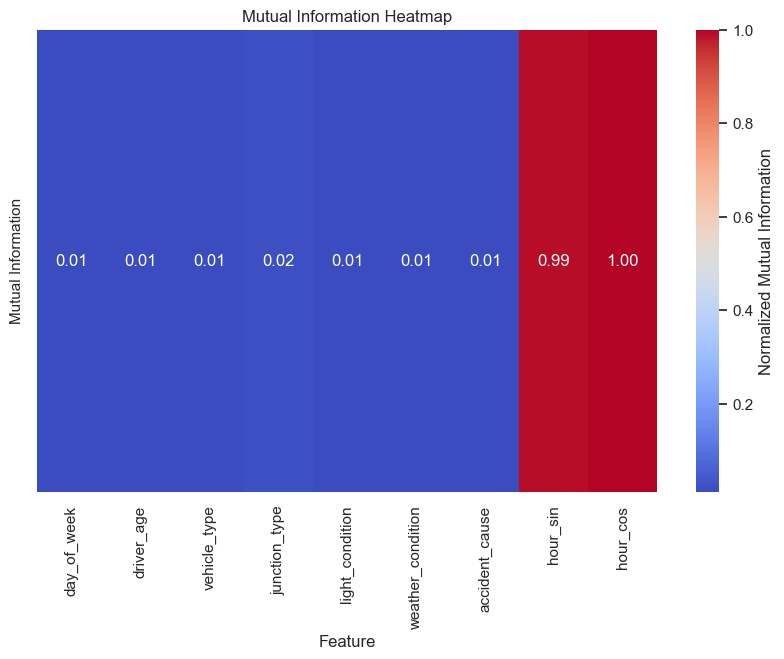

In [267]:
#Visualize the MI
plt.figure(figsize=(20,10))
# Prepare DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': scaled_df.drop(columns=[target,*numerical_columns]).columns,
    'Mutual Information': mi_scaled
})

# Filter out low MI features
mi_df = mi_df[mi_df['Mutual Information'] > 0.01]

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    mi_df.set_index('Feature').T,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Normalized Mutual Information'}
)
plt.title("Mutual Information Heatmap")
plt.show()


### Attribue Subset Selection Using Embbeded Methods

#### Random Forest

In [268]:
rf=RandomForestClassifier()
X=scaled_df.drop(columns=['accident_severity'])
Y=scaled_df['accident_severity']
rf.fit(X,Y)
feature_importance=rf.feature_importances_
importance_df=pd.DataFrame({"Feature":X.columns,"Importance":feature_importance})


In [269]:
importance_df.sort_values(by='Importance',ascending=False)

Feature  Importance
31                 hour_cos    0.114344
30                 hour_sin    0.107677
29           accident_cause    0.061347
0               day_of_week    0.054093
6              vehicle_type    0.052949
10            accident_area    0.045919
5        driving_experience    0.042894
19        vehicles_involved    0.041279
1                driver_age    0.035099
11                    lanes    0.034521
13            junction_type    0.033403
20               casualties    0.033360
21         vehicle_movement    0.032695
24             casualty_age    0.032019
3         educational_level    0.029759
8              service_year    0.029228
18           collision_type    0.027172
26            casualty_work    0.023827
16          light_condition    0.019756
12          road_allignment    0.019266
22           casualty_class    0.017870
15  road_surface_conditions    0.015690
4   vehicle_driver_relation    0.015131
17        weather_condition    0.012996
23             casualty_sex    0.012607
7             vehicle_owner    0.011821
28      pedestrian_movement    0.011656
14             surface_type    0.011119
2                driver_sex    0.007955
25        casualty_severity    0.007476
27         casualty_fitness    0.002618
9            vehicle_defect    0.002452

In [270]:
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')
rfecv.fit(X, Y)

print("Optimal number of features:", rfecv.n_features_)
selected_features = X.columns[rfecv.support_]


Optimal number of features: 14


In [271]:
features_to_exclude=list(importance_df.loc[26:,'Feature'])
reduced_df=scaled_df.drop(columns=features_to_exclude)

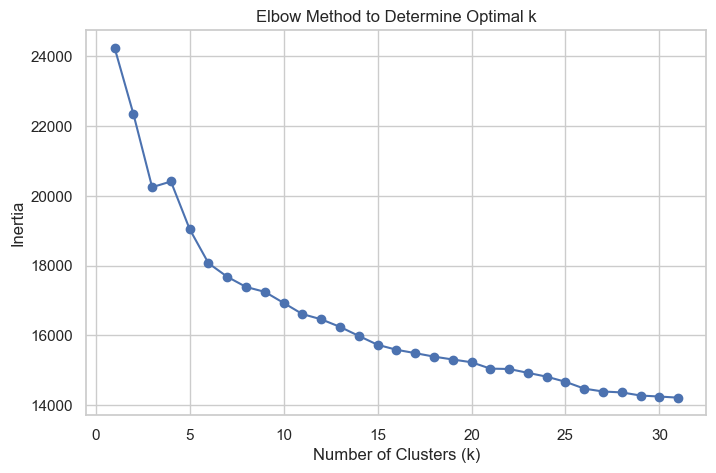

In [272]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 32) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [273]:
# Apply KMeans with the chosen number of clusters (e.g., k=4)
k = 30  # Replace with the optimal value from the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add cluster labels to the original dataset
df['cluster'] = clusters


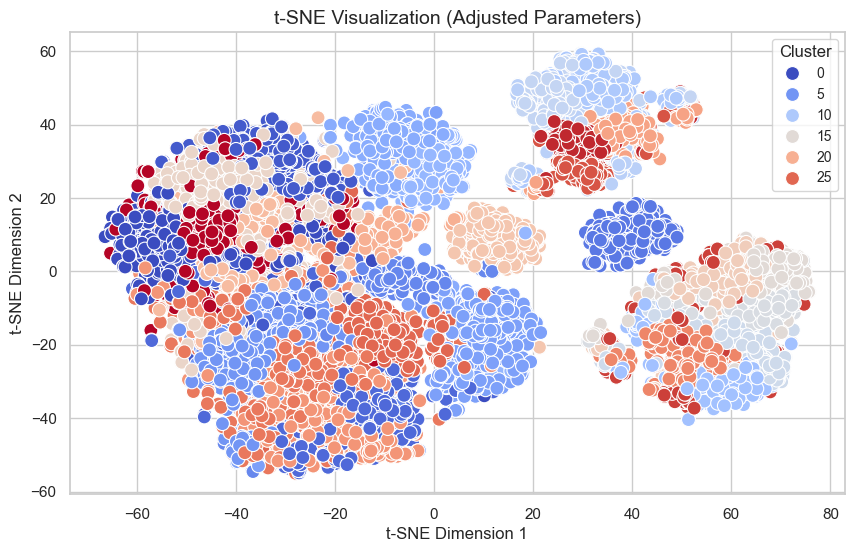

In [274]:
# Experiment with different perplexity and iterations
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(scaled_df)

# Update t-SNE values
df['tSNE1'] = tsne_results[:, 0]
df['tSNE2'] = tsne_results[:, 1]

# Re-plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tSNE1', y='tSNE2', hue='cluster', palette='coolwarm', s=100)
plt.title('t-SNE Visualization (Adjusted Parameters)', fontsize=14)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.show()



In [275]:

clustered_df= scaled_df.copy(deep=True)
clustered_df['cluster'] = clusters  # `clusters` contains the cluster labels from K-Means
# Group by cluster and compute mean or median for numerical features
cluster_summary = clustered_df.groupby('cluster').size()
#cluster_summary



In [276]:
decoded_clustered_df=imputed_decoded_df
decoded_clustered_df['cluster']=clusters
decoded_clustered_df.groupby('cluster').describe(include='object')

day_of_week                        driver_age                     \
              count unique        top freq      count unique    top freq   
cluster                                                                    
0               569      7    Tuesday  135        569      4  18-30  282   
1               558      7     Friday  147        558      4  18-30  256   
2               544      6     Friday  162        544      4  18-30  234   
3               389      7     Friday   74        389      4  18-30  171   
4               211      7   Thursday   36        211      4  18-30   92   
5               826      7   Thursday  186        826      4  18-30  418   
6               677      7   Thursday  114        677      4  31-50  278   
7               426      7     Friday   73        426      4  18-30  185   
8               366      7     Friday   71        366      4  31-50  176   
9               348      7  Wednesday   67        348      4  31-50  150   
10              342      7   Saturday   65        342      4  18-30  148   
11              107      7     Friday   27        107      4  31-50   47   
12              314      7  Wednesday   60        314      4  31-50  122   
13              339      7  Wednesday   61        339      4  18-30  141   
14              310      7     Friday   58        310      4  18-30  129   
15              279      7  Wednesday   52        279      4  31-50  116   
16              727      5   Thursday  208        727      4  18-30  304   
17              373      7   Thursday   71        373      4  18-30  172   
18              444      7    Tuesday   69        444      4  18-30  351   
19              244      7     Friday   45        244      4  18-30  108   
20              201      7    Tuesday   43        201      4  18-30   95   
21              317      7   Saturday   72        317      4  18-30  147   
22              674      5   Thursday  226        674      4  18-30  261   
23              397      7     Friday   68        397      4  18-30  197   
24              720      5     Monday  212        720      4  31-50  322   
25              472      7     Friday   79        472      4  18-30  218   
26              189      7     Friday   37        189      4  18-30   72   
27              183      7     Friday   34        183      4  18-30   85   
28              243      7  Wednesday   51        243      4  18-30   88   
29              527      5     Monday  217        527      4  31-50  230   

        driver_sex         ... pedestrian_movement      accident_cause         \
             count unique  ...                 top freq          count unique   
cluster                    ...                                                  
0              569      1  ...    Not a Pedestrian  539            569     16   
1              558      1  ...    Not a Pedestrian  534            558     17   
2              544      1  ...    Not a Pedestrian  518            544     17   
3              389      2  ...    Not a Pedestrian  327            389     17   
4              211      2  ...    Not a Pedestrian  207            211     15   
5              826      1  ...    Not a Pedestrian  781            826     17   
6              677      1  ...    Not a Pedestrian  648            677     15   
7              426      1  ...    Not a Pedestrian  403            426     16   
8              366      2  ...    Not a Pedestrian  350            366     16   
9              348      2  ...    Not a Pedestrian  258            348     16   
10             342      2  ...    Not a Pedestrian  321            342     16   
11             107      2  ...    Not a Pedestrian   87            107     13   
12             314      2  ...    Not a Pedestrian  299            314     14   
13             339      2  ...    Not a Pedestrian  339            339     16   
14             310      2  ...    Not a Pedestrian  310            310     17   
15             279      2  ...    Not a P

In [277]:
# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(clustered_df.drop('cluster', axis=1), clustered_df['cluster'])

# Get tree-based feature importance
tree_importances = rf.feature_importances_

# Calculate permutation importance
result = permutation_importance(
    rf, clustered_df.drop('cluster', axis=1), clustered_df['cluster'], n_repeats=10, random_state=42
)
perm_importances = result.importances_mean

# Combine and visualize feature importance
importances_df = pd.DataFrame({
    'Feature': clustered_df.drop('cluster', axis=1).columns,
    'Tree Importance': tree_importances,
    'Permutation Importance': perm_importances
})


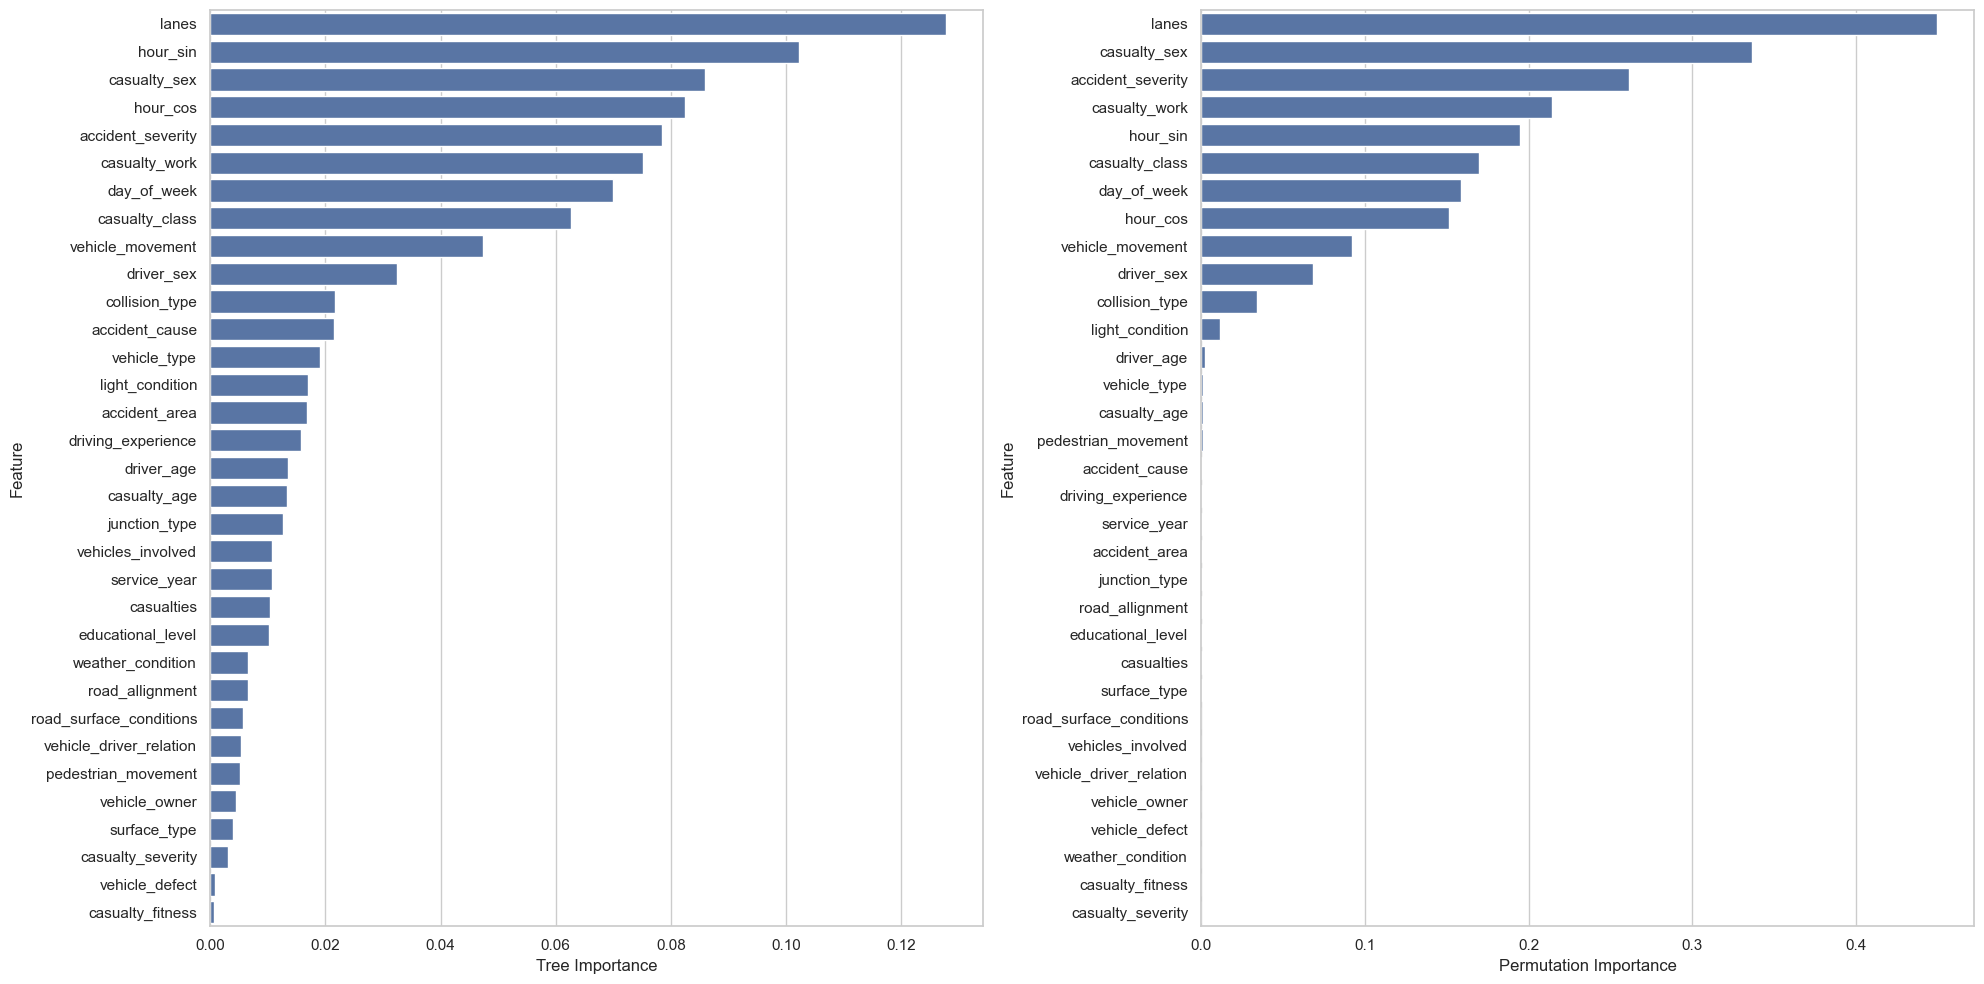

In [278]:

# Sort by permutation importance and plot
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(data=importances_df.sort_values(by="Tree Importance",ascending=False),y='Feature',x="Tree Importance",ax=ax[0])
sns.barplot(data=importances_df.sort_values(by='Permutation Importance',ascending=False),y='Feature',x="Permutation Importance",ax=ax[1])
plt.tight_layout()
# importances_df

In [279]:

top_ten_clustering_featues=list(importances_df[importances_df['Permutation Importance'] > 0.01].sort_values(by="Permutation Importance", ascending=False)['Feature'])
top_ten_clustering_featues = [('hour' if feat in ['hour_sin','hour_cos'] else feat) for feat in top_ten_clustering_featues]
top_ten_clustering_featues.append('cluster')
decoded_clustered_df[top_ten_clustering_featues].groupby('cluster').describe(include='object')

lanes                                                                \
        count unique                                               top freq   
cluster                                                                       
0         569      4  Two-way (divided with broken lines road marking)  498   
1         558      4  Two-way (divided with broken lines road marking)  487   
2         544      4                                 Undivided Two way  328   
3         389      6  Two-way (divided with broken lines road marking)  149   
4         211      3                                 Undivided Two way  128   
5         826      4                                 Undivided Two way  462   
6         677      3                                 Undivided Two way  445   
7         426      4  Two-way (divided with broken lines road marking)  326   
8         366      4  Two-way (divided with broken lines road marking)  272   
9         348      4                                 Undivided Two way  191   
10        342      3  Two-way (divided with broken lines road marking)  304   
11        107      5                                 Undivided Two way   37   
12        314      3  Two-way (divided with broken lines road marking)  278   
13        339      4                                 Undivided Two way  196   
14        310      3  Two-way (divided with broken lines road marking)  251   
15        279      3  Two-way (divided with broken lines road marking)  247   
16        727      4  Two-way (divided with broken lines road marking)  626   
17        373      3  Two-way (divided with broken lines road marking)  307   
18        444      6  Two-way (divided with broken lines road marking)  164   
19        244      5  Two-way (divided with broken lines road marking)  185   
20        201      4  Two-way (divided with broken lines road marking)  166   
21        317      4                                 Undivided Two way  186   
22        674      4                                 Undivided Two way  438   
23        397      3                                 Undivided Two way  226   
24        720      4                                 Undivided Two way  392   
25        472      6                                 Undivided Two way  247   
26        189      5                                 Undivided Two way  116   
27        183      6  Two-way (divided with broken lines road marking)   55   
28        243      4                                 Undivided Two way  137   
29        527      4  Two-way (divided with broken lines road marking)  454   

        casualty_sex                     accident_severity         ...  \
               count unique     top freq             count unique  ...   
cluster                                                            ...   
0                569      1    Male  569               569      1  ...   
1                558      1    Male  558               558      1  ...   
2                544      1    Male  544               544      1  ...   
3                389      1  Female  389               389      2  ...   
4                211      1    Male  211               211      1  ...   
5                826      1    Male  826               826      1  ...   
6                677      1    Male  677               677      1  ...   
7                426      1    Male  426               426      1  ...   
8                366      1    Male  366               366      1  ...   
9                348      1  Female  348               348      1  ...   
10               342      1    Male  342               342      2  ...   
11               107      1    Male  107               107      2  ...   
12               314      1    Male  314               314      2  ...   
13               339      1  Female  339               339      1  ...   
14               310      1  Female  310               310      1  ...   
15               279      1  Female  279               279      1  .

In [280]:
# importances_df[importance_df['Permutation Importance']>0.01].sort_values(by="Permutation Importance",ascending=False)
top_ten_clustering_featues=list(importances_df[importances_df['Permutation Importance'] > 0.01].sort_values(by="Permutation Importance", ascending=False)['Feature'])
decoded_clustered_df.columns

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity', 'hour', 'minute', 'cluster'],
      dtype='object')

<a id='insight'></a>
# Insights and Recommendations
⬆️ [Tabel of Contents](#contents_tabel)

### 1. Accident Trends

- <b>Number of Vehicles:</b> As the number of vehicles involved in an accident increases, the fatality rate decreases. No fatalities were observed for accidents involving four or more vehicles.

- <b>Time of Day:</b> Most accidents occur during three critical periods: 

   - 	8:00 AM: Start of work hours.

   - 	1:00 PM: Lunch hour.

   - 	5:00 PM: End of work hours.

   - 	Daylight: A majority (71.4%) of accidents happen during daylight.

   - 	Day of the Week: Fridays are the most accident-prone. The accident decreases from Friday to   Thursday  then Wednesday right up to Sunday in an orderly fashion

2. Demographics and Severity

    - 	Gender: Male drivers are involved in more accidents, though the severity of accidents involving females is comparable.
    - 	Age: Underage drivers have the highest percentage of serious accidents (20.5%). Drivers aged 31–50 have the lowest serious accident rate (13.2%) and fatalities (1.3%).
    - 	Experience: Accident frequency increases with driving experience up to 10 years and declines thereafter.

3. Road and Environmental Conditions

    - Junctions: “No Junction” points have the highest fatality proportion (1.9%). Serious accidents are most common in “O Shape” and “No Junction” areas.
    - Weather: Rain accounts for the highest fatality percentage (1.7%), despite 81.7% of accidents occurring in clear weather. Windy conditions lead to the highest serious injury rate (16.3%).

4. Collision Types

   - Vehicle-to-Vehicle Collisions: Represent 71.2% of all accidents.
   - Train Collisions: Lead to the highest percentage of serious injuries (22.3%).
   - Pedestrian Collisions: Account for the highest fatality percentage (2.5%).

5. Causes of Accidents

   - Overspeeding: While less frequent, it results in the highest proportion of serious accidents.
   - Improper Parking: Causes the highest proportion of fatalities (4%).
   - Changing Lanes: The most prominent cause, followed by no distancing and careless driving.

6. Feature Importance

   - Mutual Information Scores: Features with MI scores below 0.01, such as “Casualty Sex,” were deemed insignificant and recommended for exclusion.
________________________________________
<b>Discussion</b>

The analysis highlights significant patterns in road accidents in Addis Ababa. Key insights include the influence of driver behavior, time, and environmental conditions on accident severity. The findings suggest targeted interventions, such as:
   - Time-Based Measures: Enhanced traffic management during peak hours.
   - Driver Training: Focused programs for underage and inexperienced drivers.
   - Infrastructure Improvements: Upgrades at high-risk junctions and better drainage systems for rainy conditions.
   - Policy Interventions: Stricter enforcement of speed limits and parking regulations.
________________________________________
<b>Conclusion and Recommendations</b>

This study provides a data-driven foundation for improving road safety in Addis Ababa. Key recommendations include:
1.	Education Campaigns: Targeting drivers about risks associated with overspeeding and improper parking.
2.	Improved Traffic Management: Addressing peak-hour congestion and enhancing road infrastructure.
3.	Technology Integration: Using AI and real-time monitoring to identify and address high-risk scenarios.
4.	Policy Reforms: Strengthening laws on underage driving and enforcing penalties for violations.
By implementing these measures, Addis Ababa can reduce accident severity and enhance road safety for all users.
